In [1]:
from torchvision import datasets

train_set = datasets.CIFAR10('./cifar',download=True,train=True)
test_set = datasets.CIFAR10('./cifar',download=True,train=False)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def print_img(img1, img2):
    fig = plt.figure(0)
    fig.set_size_inches(18.5, 18.5)
    fig.add_subplot(8,8,1)
    plt.imshow(img1)
    fig.add_subplot(8,8,2)
    plt.imshow(img2)
    plt.show()

************************
LPIPS
************************

In [44]:
use_gpu = True

## Initializing the model
loss_fn = lpips.LPIPS(net='alex',version='0.1')

if(use_gpu):
    loss_fn.cuda()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/msimoni/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/msimoni/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/msimoni/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


In [173]:
import argparse
import lpips

def lpips_distance(tmp_img1,tmp_img2):
        
    tmp_img1.save("imgs/temp_img1.png")
    tmp_img2.save("imgs/temp_img2.png")
    
    
    # Load images
    img0 = lpips.im2tensor(lpips.load_image("imgs/temp_img1.png")) # RGB image from [-1,1]
    img1 = lpips.im2tensor(lpips.load_image('imgs/temp_img2.png'))
    
    if(use_gpu):
    	img0 = img0.cuda()
    	img1 = img1.cuda()
    
    # Compute distance
    dist01 = loss_fn.forward(img0, img1)
    
    return dist01.item() 


******************************
SIFT
*****************************

In [4]:
def convert(img):
    image = img.convert('RGB')
    image = numpy.array(image)[:, :, ::-1].copy()
    return image

In [143]:
import cv2
import numpy
import math

def sift_image_distance(img1, img2):
    img1 = convert(img1)
    img2 = convert(img2)
    # Convert images to grayscale if needed
    if len(img1.shape) == 3:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) == 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Ensure descriptors are valid
    if des1 is None or des2 is None:
        #print("No SIFT features detected in one or both images.")
        return math.inf

    # Use brute-force matcher with L2 norm
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Ensure matches exist
    if not matches:
        #print("No matches found.")
        return math.inf

    # Compute average distance
    avg_distance = sum(m.distance for m in matches) / len(matches)
    
    return avg_distance

# Example usage:
# img1 = cv2.imread("image1.jpg")
# img2 = cv2.imread("image2.jpg")
# distance = sift_image_distance(img1, img2)
# print("Average SIFT Feature Distance:", distance)


LPIPS Distance: 0.000 	 SIFT Distance: 0.000


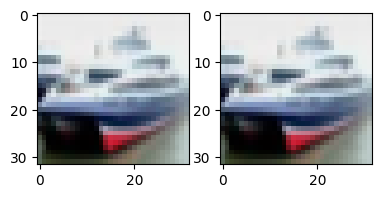

LPIPS Distance: 0.112 	 SIFT Distance: 414.162


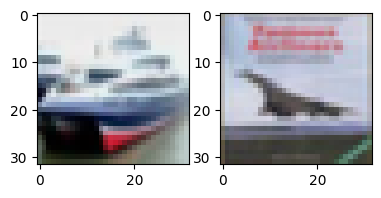

LPIPS Distance: 0.144 	 SIFT Distance: 380.109


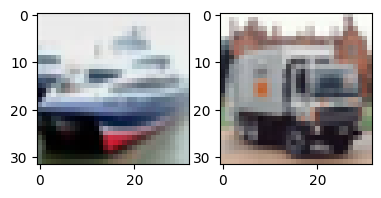

LPIPS Distance: 0.140 	 SIFT Distance: 428.539


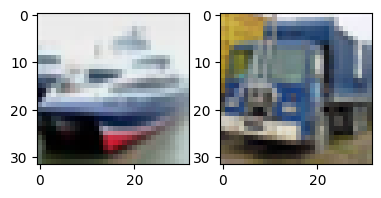

LPIPS Distance: 0.149 	 SIFT Distance: 422.857


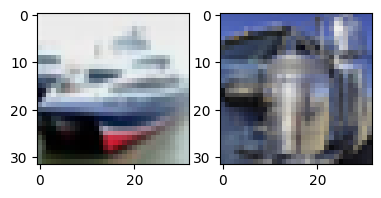

LPIPS Distance: 0.134 	 SIFT Distance: 447.706


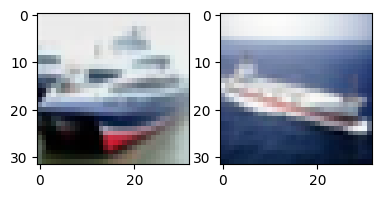

LPIPS Distance: 0.136 	 SIFT Distance: 432.526


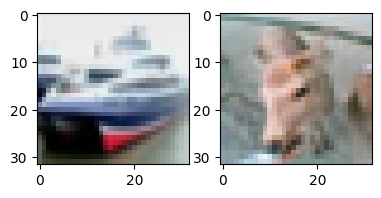

LPIPS Distance: 0.145 	 SIFT Distance: 418.272


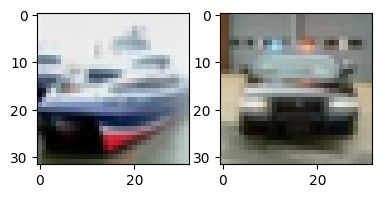

LPIPS Distance: 0.109 	 SIFT Distance: 402.518


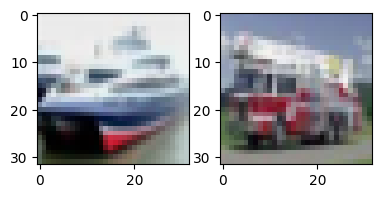

LPIPS Distance: 0.144 	 SIFT Distance: 393.768


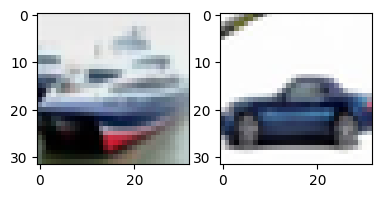

LPIPS Distance: 0.120 	 SIFT Distance: 396.369


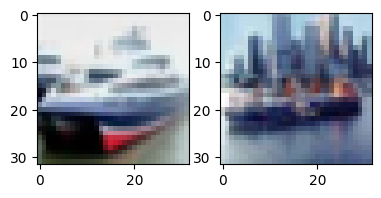

LPIPS Distance: 0.140 	 SIFT Distance: 371.493


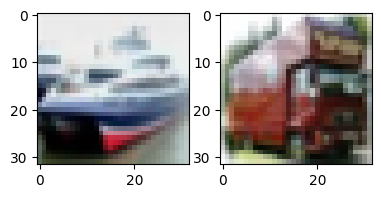

LPIPS Distance: 0.122 	 SIFT Distance: 408.780


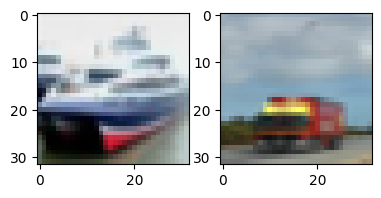

LPIPS Distance: 0.145 	 SIFT Distance: 441.758


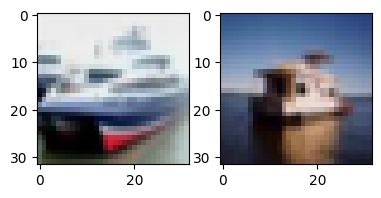

LPIPS Distance: 0.133 	 SIFT Distance: 411.904


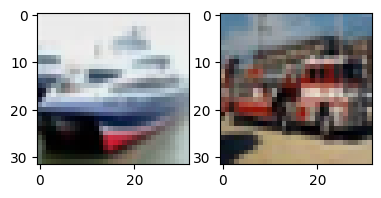

LPIPS Distance: 0.140 	 SIFT Distance: 385.658


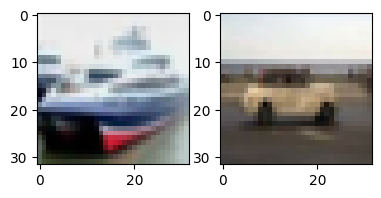

LPIPS Distance: 0.138 	 SIFT Distance: 403.266


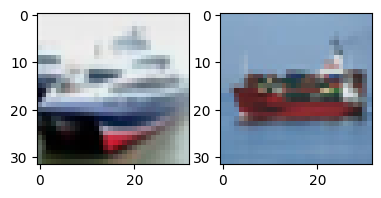

LPIPS Distance: 0.147 	 SIFT Distance: 442.399


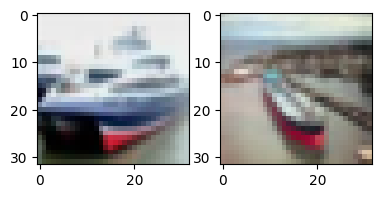

LPIPS Distance: 0.120 	 SIFT Distance: 409.152


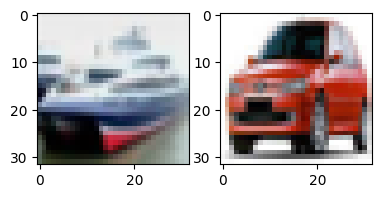

LPIPS Distance: 0.141 	 SIFT Distance: 427.500


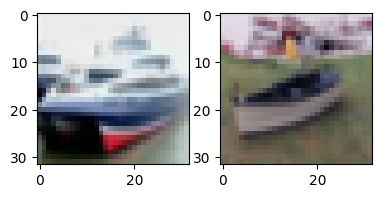

LPIPS Distance: 0.136 	 SIFT Distance: 434.595


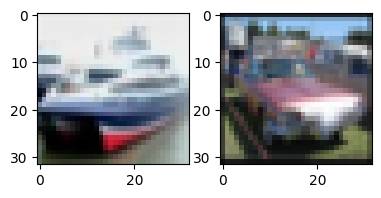

LPIPS Distance: 0.150 	 SIFT Distance: 436.810


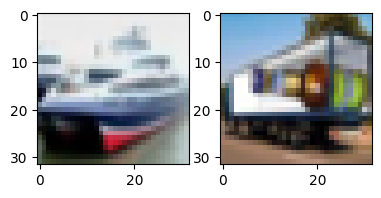

LPIPS Distance: 0.132 	 SIFT Distance: 410.454


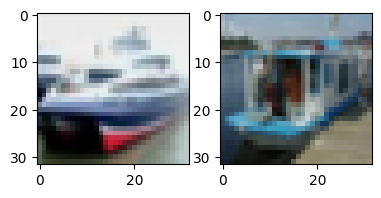

LPIPS Distance: 0.104 	 SIFT Distance: 379.836


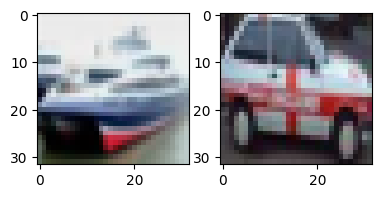

LPIPS Distance: 0.141 	 SIFT Distance: 381.288


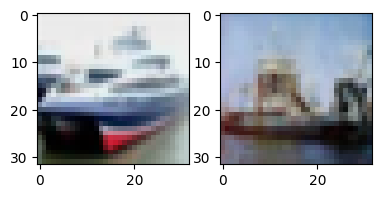

LPIPS Distance: 0.142 	 SIFT Distance: 372.814


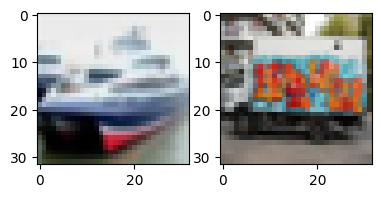

LPIPS Distance: 0.123 	 SIFT Distance: 348.286


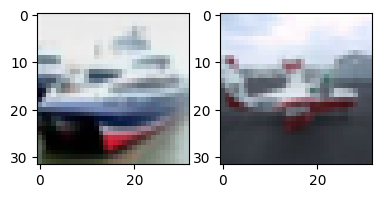

LPIPS Distance: 0.136 	 SIFT Distance: 407.265


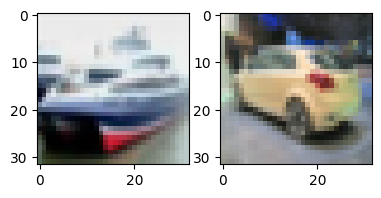

LPIPS Distance: 0.135 	 SIFT Distance: 371.117


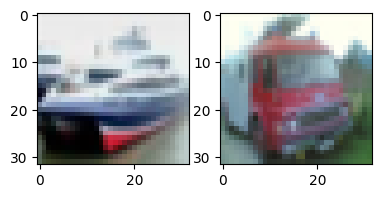

LPIPS Distance: 0.148 	 SIFT Distance: 376.444


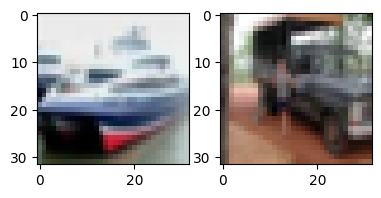

LPIPS Distance: 0.127 	 SIFT Distance: 355.226


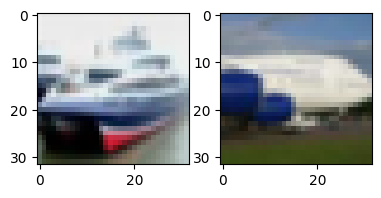

LPIPS Distance: 0.118 	 SIFT Distance: 362.551


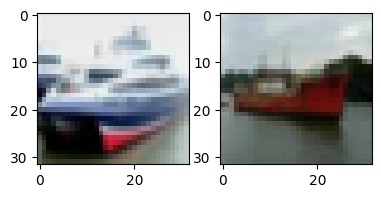

LPIPS Distance: 0.139 	 SIFT Distance: 361.100


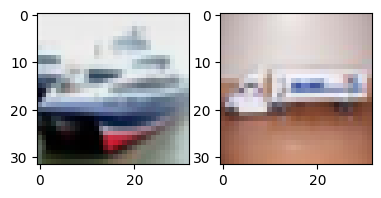

LPIPS Distance: 0.139 	 SIFT Distance: 351.530


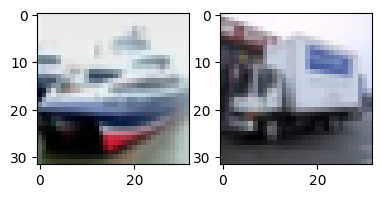

LPIPS Distance: 0.149 	 SIFT Distance: 407.281


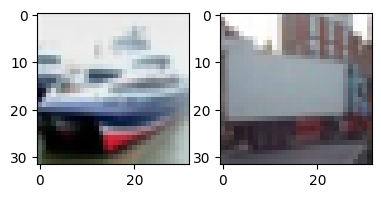

LPIPS Distance: 0.129 	 SIFT Distance: 387.639


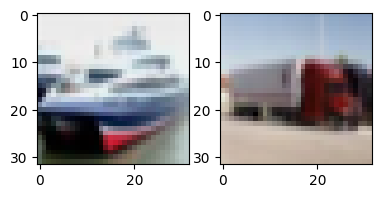

LPIPS Distance: 0.135 	 SIFT Distance: 358.538


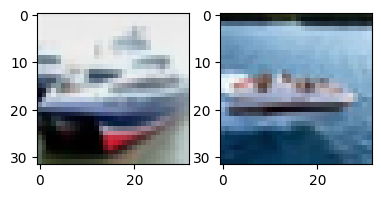

LPIPS Distance: 0.141 	 SIFT Distance: 389.428


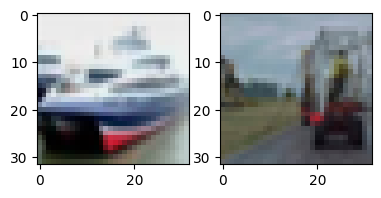

LPIPS Distance: 0.121 	 SIFT Distance: 374.798


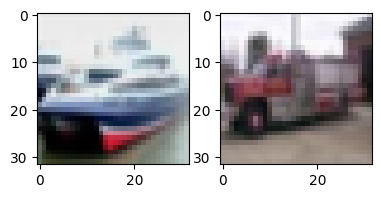

LPIPS Distance: 0.128 	 SIFT Distance: 380.297


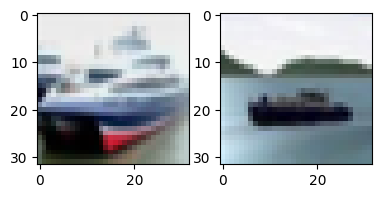

LPIPS Distance: 0.127 	 SIFT Distance: 427.233


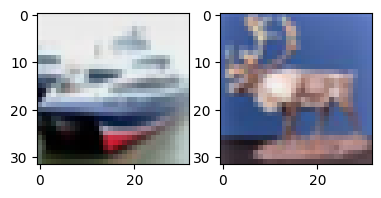

LPIPS Distance: 0.108 	 SIFT Distance: 373.692


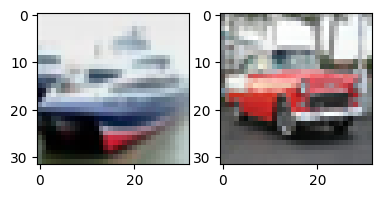

LPIPS Distance: 0.149 	 SIFT Distance: 402.085


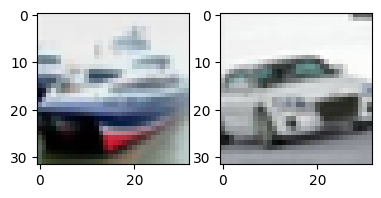

LPIPS Distance: 0.137 	 SIFT Distance: 414.672


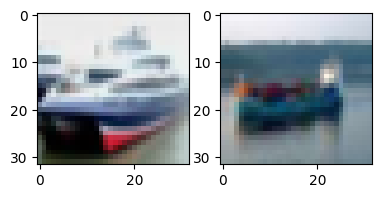

LPIPS Distance: 0.143 	 SIFT Distance: 377.510


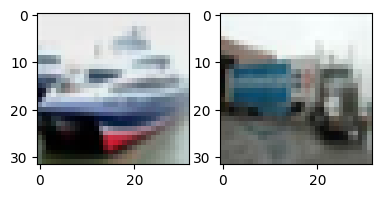

LPIPS Distance: 0.120 	 SIFT Distance: 399.979


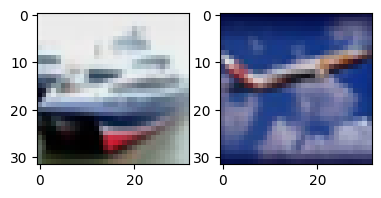

LPIPS Distance: 0.106 	 SIFT Distance: 389.863


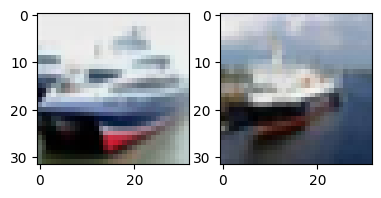

LPIPS Distance: 0.136 	 SIFT Distance: 422.144


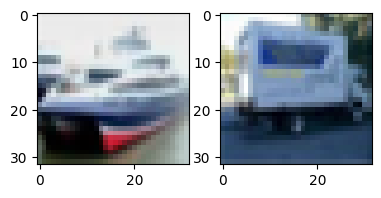

LPIPS Distance: 0.148 	 SIFT Distance: 399.708


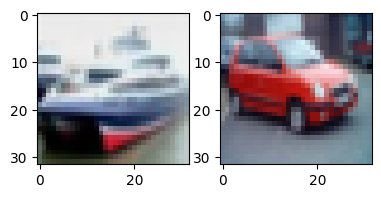

LPIPS Distance: 0.141 	 SIFT Distance: 427.826


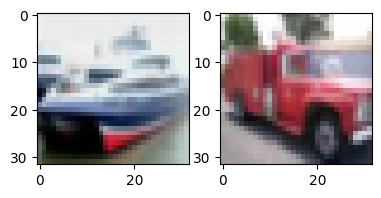

LPIPS Distance: 0.128 	 SIFT Distance: 367.524


KeyboardInterrupt: 

In [145]:
for i in range(1, len(test_set)):
    for j in range(i,len(test_set)):
        
        lpips_dist = lpips_distance(test_set[i][0], test_set[j][0])
        sift_dist = sift_image_distance(test_set[i][0], test_set[j][0])
        
        #print(d,end='\r')
        
        if(lpips_dist< 0.15):
            print('LPIPS Distance: %.3f'%lpips_dist, "\t SIFT Distance: %.3f"%sift_dist)
            print_img(test_set[i][0], test_set[j][0])
            #break

In [31]:
from PIL import Image, ImageEnhance
import random
from torchvision.transforms import Resize

def random_transform(img):
    # Random rotation
    angle = random.randint(0, 360)
    img = img.rotate(angle)

    # Random cropping
    width, height = img.size
    left = random.randint(0, width // 4)
    top = random.randint(0, height // 4)
    right = random.randint(3 * width // 4, width)
    bottom = random.randint(3 * height // 4, height)
    img = img.crop((left, top, right, bottom))

    resize_transform = Resize((32, 32))  # Set an appropriate size
    img = resize_transform(img)  # Resize your tensor/image

    
    # Random color enhancement
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(random.uniform(0.5, 1.5))
    
    return img

In [42]:
from PIL import Image, ImageEnhance
import random
from torchvision.transforms import Resize


def single_random_transform(img):
    num = random.randint(0,2)

    if num == 0:
        # Random rotation
        angle = random.randint(0, 360)
        img = img.rotate(angle)
        
    elif num == 1:
        # Random cropping
        width, height = img.size
        left = random.randint(0, width // 4)
        top = random.randint(0, height // 4)
        right = random.randint(3 * width // 4, width)
        bottom = random.randint(3 * height // 4, height)
        img = img.crop((left, top, right, bottom))
        
        resize_transform = Resize((32, 32))  # Set an appropriate size
        img = resize_transform(img)  # Resize your tensor/image
    else:
        # Random color enhancement
        enhancer = ImageEnhance.Color(img)
        img = enhancer.enhance(random.uniform(0.5, 1.5))
    
    return img

In [62]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps, ImageDraw
import random

def apply_random_transformation(image):
    """
    Applies a random transformation to a PIL image.
    
    Args:
        image: PIL Image object.
    
    Returns:
        Transformed image.
    """
    transformations = ["crop", "rotate", "mirror", "watermark",
                       "color_adjust", "photo_filter", "blur", "sharpen"]
    choice = random.choice(transformations)

    if choice == "crop":
        w, h = image.size
        left = random.randint(0, w // 4)
        top = random.randint(0, h // 4)
        right = random.randint(3 * w // 4, w)
        bottom = random.randint(3 * h // 4, h)
        image = image.crop((left, top, right, bottom))

    elif choice == "rotate":
        angle = random.choice([90, 180, 270])
        image = image.rotate(angle)

    elif choice == "mirror":
        image = ImageOps.mirror(image) if random.choice([True, False]) else ImageOps.flip(image)

    elif choice == "watermark":
        draw = ImageDraw.Draw(image)
        text = "Watermark"
        draw.text((image.width - 100, image.height - 50), text, fill=(255, 255, 255, 128))

    elif choice == "color_adjust":
        factor = random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Color(image)
        image = enhancer.enhance(factor)

    elif choice == "photo_filter":
        image = image.convert("L").convert("RGB")  # Simple artistic grayscale effect

    elif choice == "blur":
        image = image.filter(ImageFilter.GaussianBlur(radius=2))

    elif choice == "sharpen":
        image = image.filter(ImageFilter.SHARPEN)

    
    resize_transform = Resize((32, 32))  # Set an appropriate size
    image = resize_transform(image)  # Resize your tensor/image

    return image

In [63]:
tmp_images = []
tmp_rotated_images = []
tmp_transformed_images = []
single_transformation_images = []

count = 0

for img, label in train_set:
    tmp_images.append(img) 
    tmp_rotated_images.append(img.rotate(180))
    tmp_trans_img = random_transform(img)
    tmp_transformed_images.append(tmp_trans_img) 
    sing_trans_img = apply_random_transformation(img)
    single_transformation_images.append(sing_trans_img) 

    
    if(count == 100):
        break
    print(count, end='\r')
    count+=1

99

Lpips Distance: 0.068  	 Sift Distance: 6.646


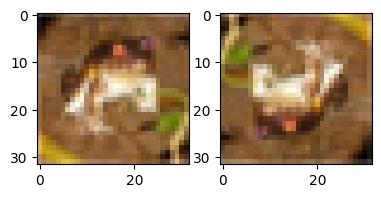

Lpips Distance: 0.076  	 Sift Distance: 30.766


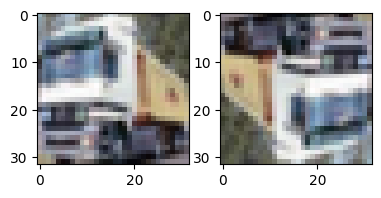

Lpips Distance: 0.099  	 Sift Distance: 15.023


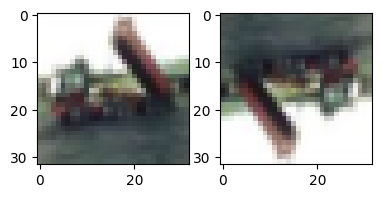

Lpips Distance: 0.057  	 Sift Distance: 18.702


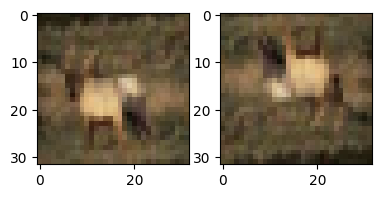

Lpips Distance: 0.128  	 Sift Distance: 33.897


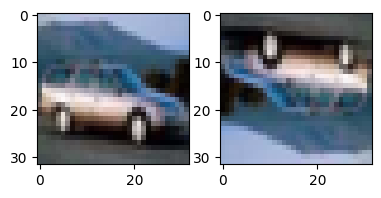

Lpips Distance: 0.064  	 Sift Distance: 6.735


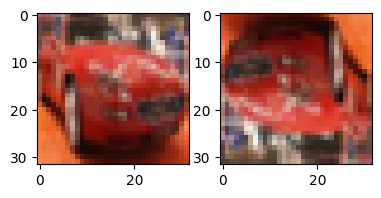

Lpips Distance: 0.071  	 Sift Distance: 13.927


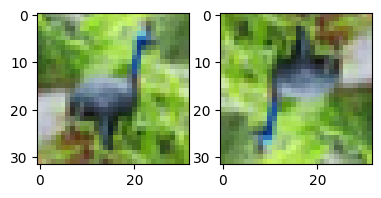

Lpips Distance: 0.116  	 Sift Distance: 5.811


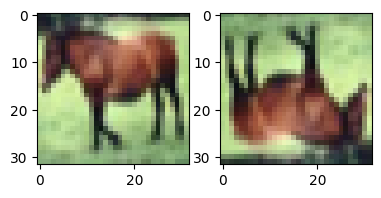

Lpips Distance: 0.108  	 Sift Distance: 8.446


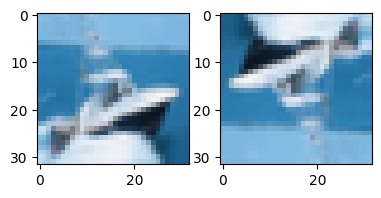

Lpips Distance: 0.104  	 Sift Distance: 20.291


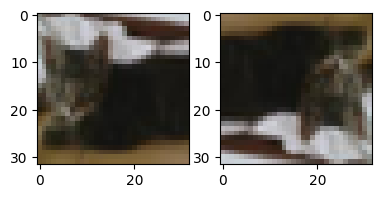

Lpips Distance: 0.034  	 Sift Distance: 10.121


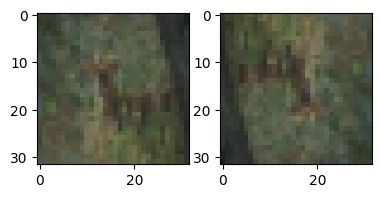

Lpips Distance: 0.060  	 Sift Distance: 28.392


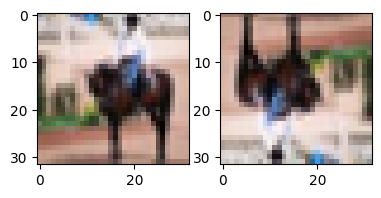

Lpips Distance: 0.111  	 Sift Distance: 8.968


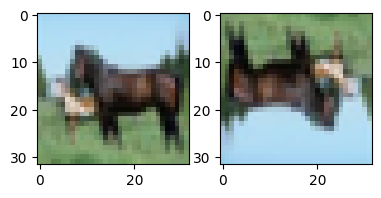

Lpips Distance: 0.108  	 Sift Distance: 12.526


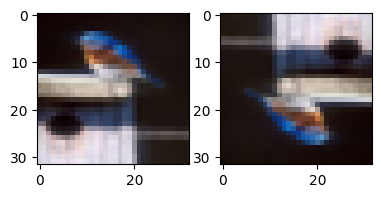

Lpips Distance: 0.064  	 Sift Distance: 9.692


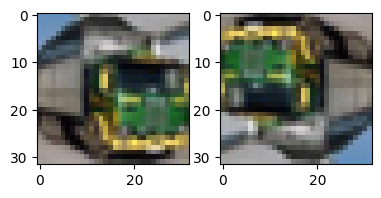

Lpips Distance: 0.119  	 Sift Distance: 29.825


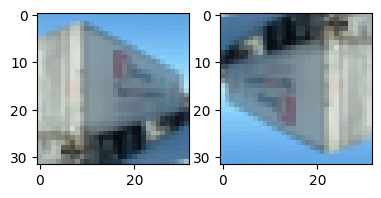

Lpips Distance: 0.114  	 Sift Distance: 6.470


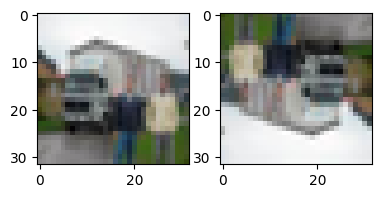

Lpips Distance: 0.068  	 Sift Distance: 7.608


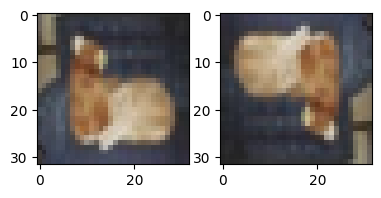

Lpips Distance: 0.042  	 Sift Distance: 108.981


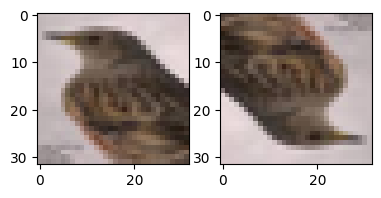

Lpips Distance: 0.052  	 Sift Distance: 14.609


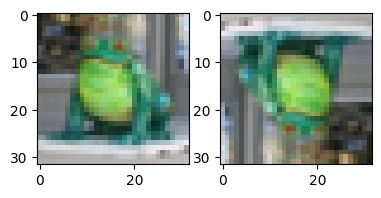

Lpips Distance: 0.080  	 Sift Distance: 22.015


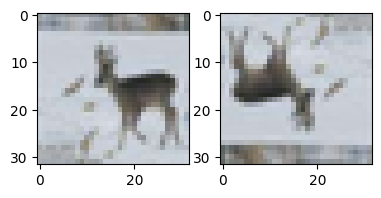

Lpips Distance: 0.037  	 Sift Distance: 15.283


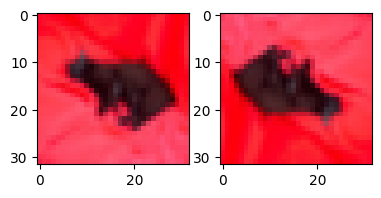

Lpips Distance: 0.057  	 Sift Distance: 7.075


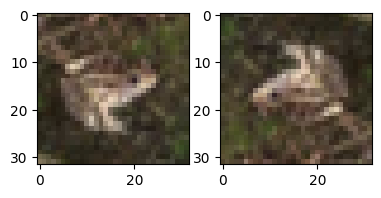

Lpips Distance: 0.065  	 Sift Distance: 32.481


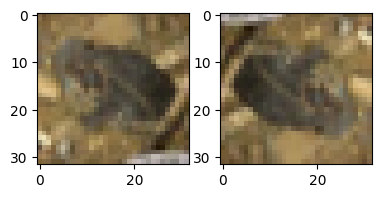

Lpips Distance: 0.055  	 Sift Distance: 0.000


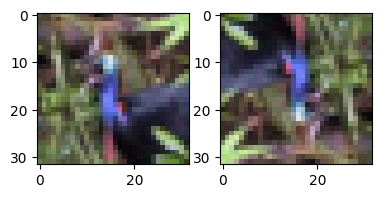

Lpips Distance: 0.072  	 Sift Distance: 17.759


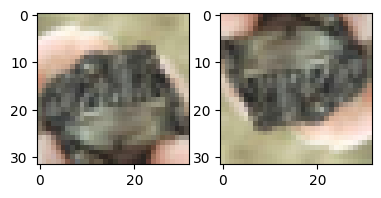

Lpips Distance: 0.081  	 Sift Distance: 13.799


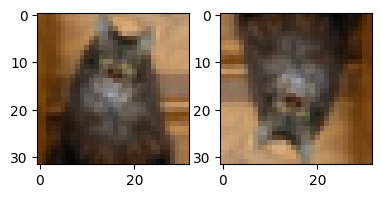

Lpips Distance: 0.060  	 Sift Distance: 7.033


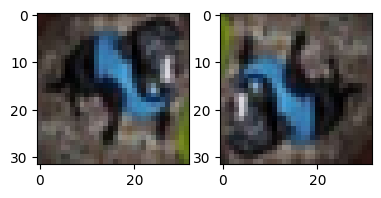

Lpips Distance: 0.065  	 Sift Distance: 0.000


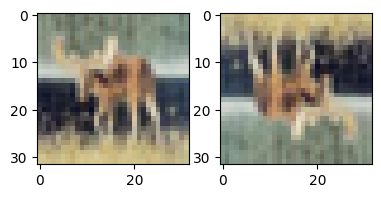

Lpips Distance: 0.070  	 Sift Distance: 17.066


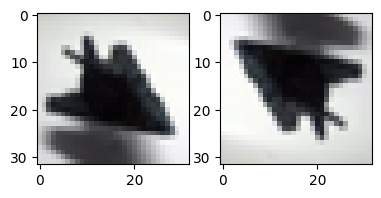

Lpips Distance: 0.099  	 Sift Distance: 0.000


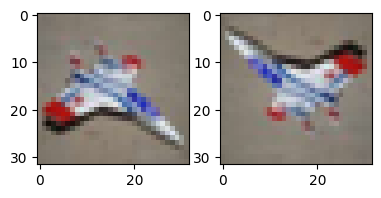

Lpips Distance: 0.122  	 Sift Distance: 10.593


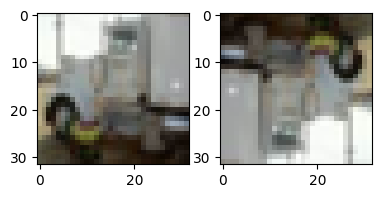

Lpips Distance: 0.070  	 Sift Distance: 11.439


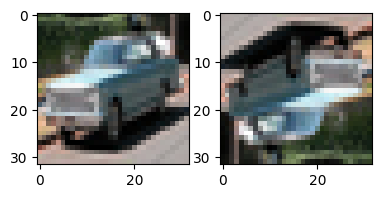

Lpips Distance: 0.100  	 Sift Distance: 8.725


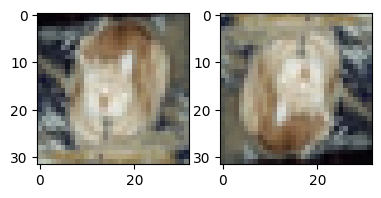

Lpips Distance: 0.077  	 Sift Distance: 6.940


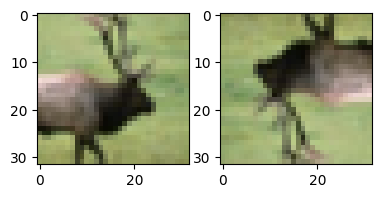

Lpips Distance: 0.111  	 Sift Distance: 43.843


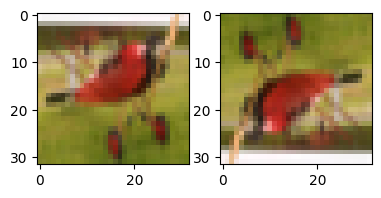

Lpips Distance: 0.079  	 Sift Distance: 13.250


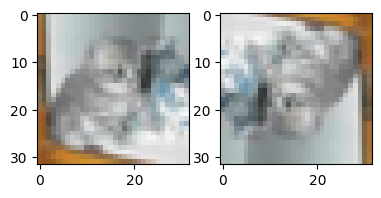

Lpips Distance: 0.075  	 Sift Distance: 12.216


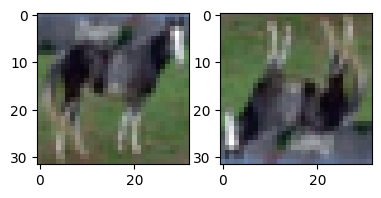

Lpips Distance: 0.095  	 Sift Distance: 19.803


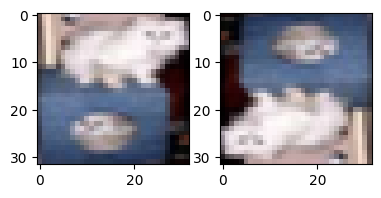

Lpips Distance: 0.055  	 Sift Distance: 5.452


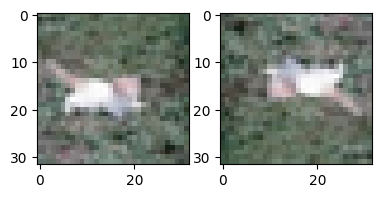

Lpips Distance: 0.069  	 Sift Distance: 7.801


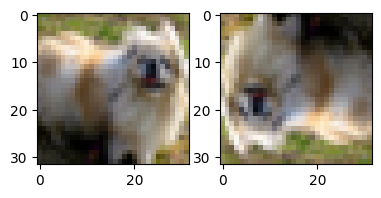

Lpips Distance: 0.046  	 Sift Distance: 90.028


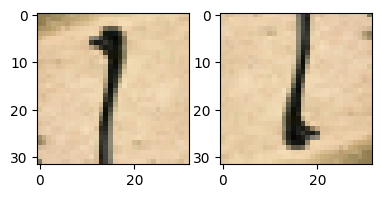

Lpips Distance: 0.069  	 Sift Distance: 76.233


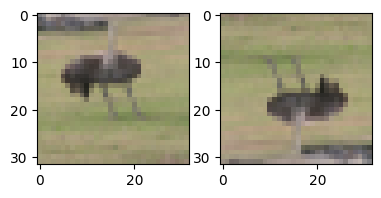

Lpips Distance: 0.067  	 Sift Distance: 6.048


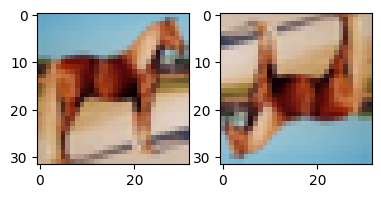

Lpips Distance: 0.069  	 Sift Distance: 17.318


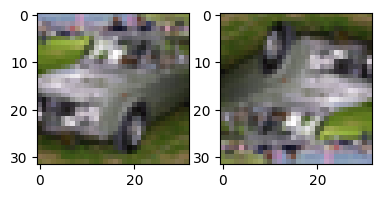

Lpips Distance: 0.074  	 Sift Distance: 7.644


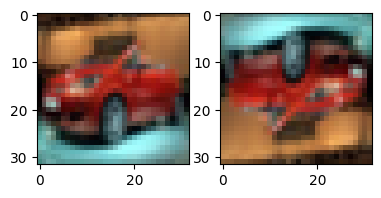

Lpips Distance: 0.060  	 Sift Distance: 18.720


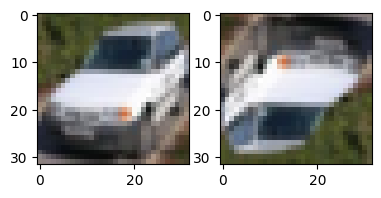

Lpips Distance: 0.108  	 Sift Distance: 0.000


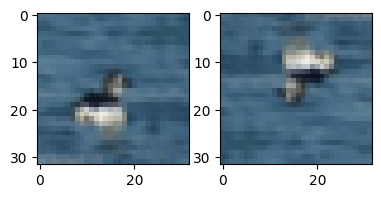

KeyboardInterrupt: 

In [44]:
max_dist = 0
for i in range(0, len(tmp_images)):
    lpips_dist = lpips_distance(tmp_images[i], tmp_rotated_images[i])
    sift_dist = sift_image_distance(tmp_images[i],tmp_rotated_images[i])
    
    max_dist = max(max_dist,lpips_dist)
    #print(d,end='\r')
    
    print('Lpips Distance: %.3f'%lpips_dist, " \t Sift Distance: %.3f"%sift_dist)
    print_img(tmp_images[i],tmp_rotated_images[i])
    #break

print("max_dist = ", max_dist)

In [ ]:
max_dist = 0
for i in range(0, len(tmp_images)):
    trans_img = tmp_transformed_images[i]
    lpips_dist = lpips_distance(tmp_images[i], tmp_transformed_images[i])
    sift_dist = sift_image_distance(tmp_images[i],tmp_transformed_images[i])
    max_dist = max(max_dist,lpips_dist)
    #print(d,end='\r')
    
    print('Lpips Distance: %.3f'%lpips_dist, "\t Sift distance: %.3f"%sift_dist)
    print_img(tmp_images[i],tmp_transformed_images[i])
        #break

print("max_dist = ", max_dist)

Lpips Distance: 0.017 	 Sift distance: 17.606


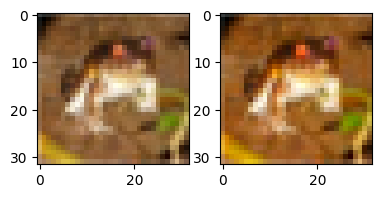

Lpips Distance: 0.045 	 Sift distance: 368.467


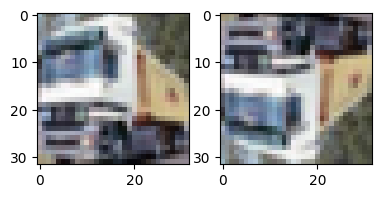

Lpips Distance: 0.000 	 Sift distance: 0.000


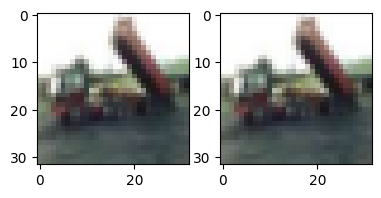

Lpips Distance: 0.005 	 Sift distance: 9.452


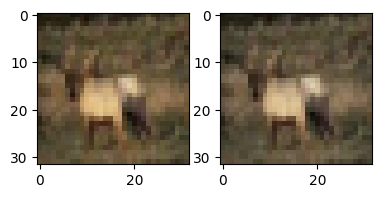

Lpips Distance: 0.392 	 Sift distance: 144.741


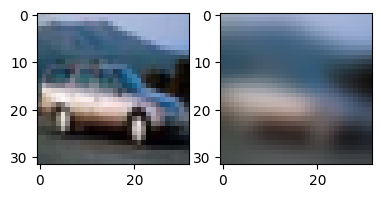

Lpips Distance: 0.055 	 Sift distance: 291.057


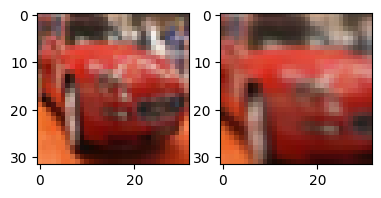

Lpips Distance: 0.027 	 Sift distance: 107.861


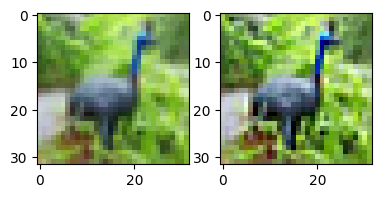

Lpips Distance: 0.000 	 Sift distance: 10.568


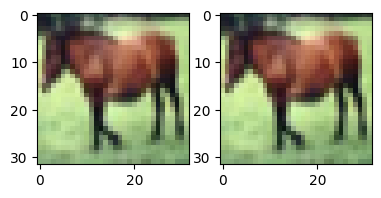

Lpips Distance: 0.000 	 Sift distance: 0.000


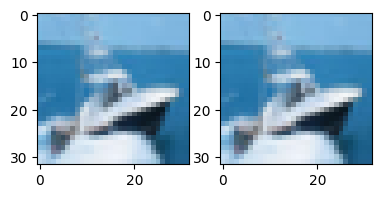

Lpips Distance: 0.022 	 Sift distance: 204.469


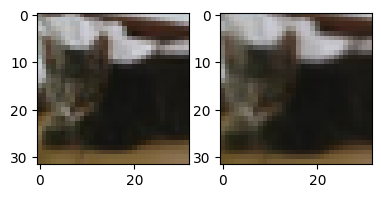

Lpips Distance: 0.000 	 Sift distance: 32.723


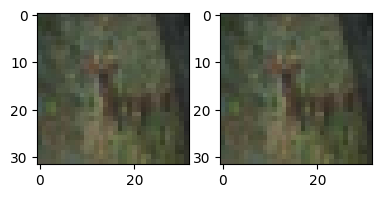

Lpips Distance: 0.447 	 Sift distance: 182.856


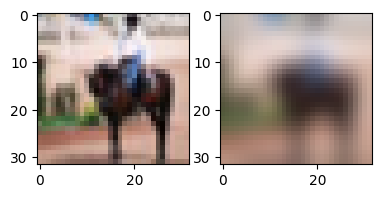

Lpips Distance: 0.145 	 Sift distance: 215.441


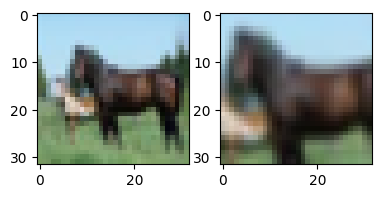

Lpips Distance: 0.068 	 Sift distance: 337.823


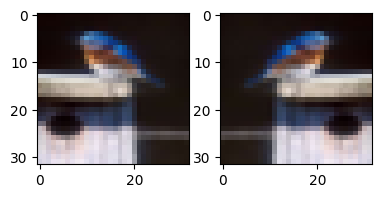

Lpips Distance: 0.064 	 Sift distance: 9.692


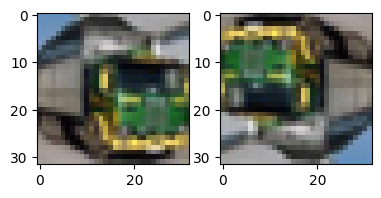

Lpips Distance: 0.007 	 Sift distance: 7.076


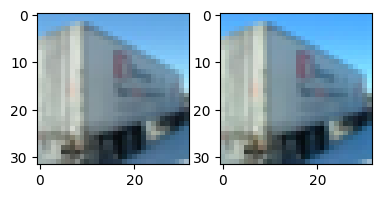

Lpips Distance: 0.064 	 Sift distance: 331.555


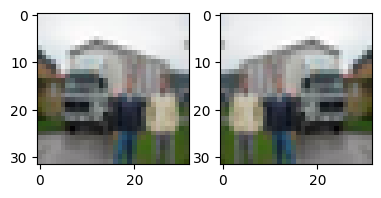

Lpips Distance: 0.162 	 Sift distance: 0.000


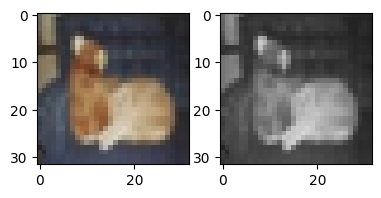

No SIFT features detected in one or both images.
Lpips Distance: 0.275 	 Sift distance: inf


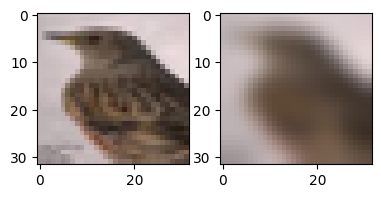

Lpips Distance: 0.000 	 Sift distance: 0.000


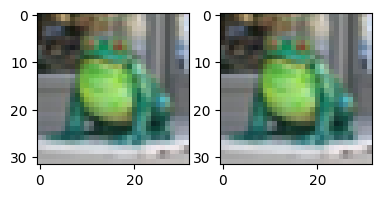

Lpips Distance: 0.389 	 Sift distance: 176.232


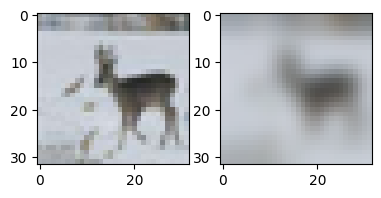

Lpips Distance: 0.456 	 Sift distance: 0.629


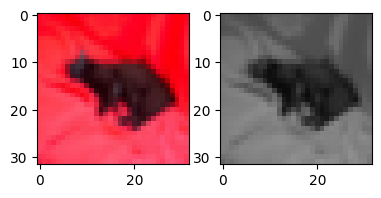

Lpips Distance: 0.054 	 Sift distance: 7.273


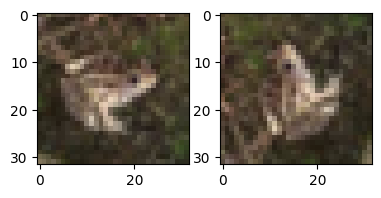

Lpips Distance: 0.346 	 Sift distance: 35.417


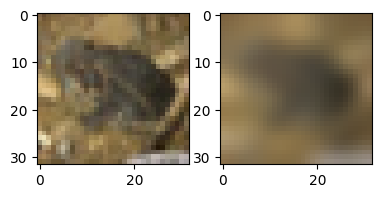

Lpips Distance: 0.048 	 Sift distance: 390.670


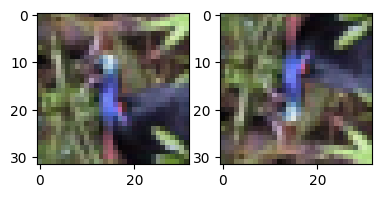

Lpips Distance: 0.048 	 Sift distance: 358.937


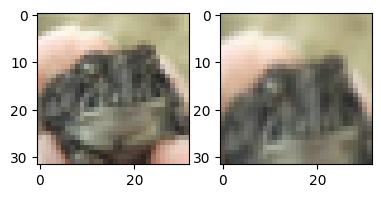

Lpips Distance: 0.043 	 Sift distance: 169.461


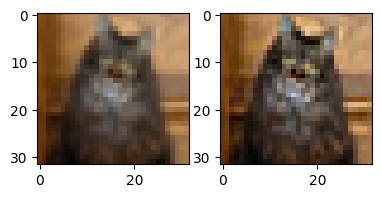

Lpips Distance: 0.021 	 Sift distance: 176.217


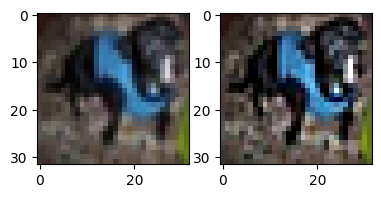

Lpips Distance: 0.095 	 Sift distance: 0.000


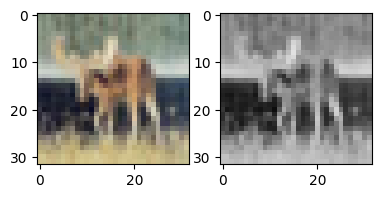

Lpips Distance: 0.000 	 Sift distance: 32.376


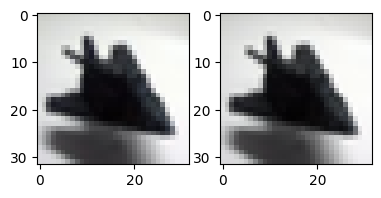

Lpips Distance: 0.115 	 Sift distance: 202.247


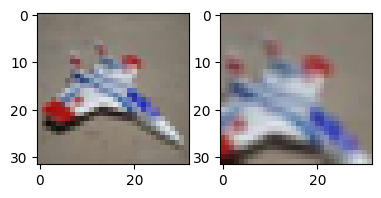

Lpips Distance: 0.079 	 Sift distance: 6.367


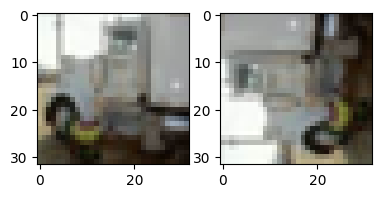

Lpips Distance: 0.000 	 Sift distance: 0.000


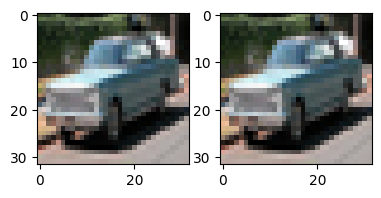

Lpips Distance: 0.088 	 Sift distance: 362.214


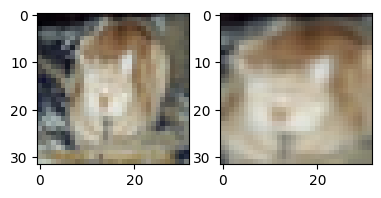

Lpips Distance: 0.150 	 Sift distance: 0.000


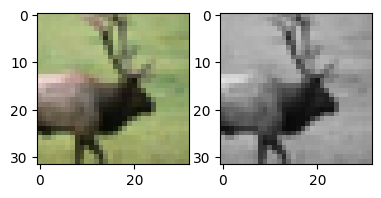

Lpips Distance: 0.085 	 Sift distance: 362.910


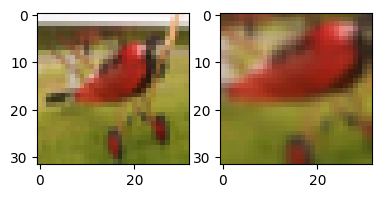

Lpips Distance: 0.029 	 Sift distance: 179.210


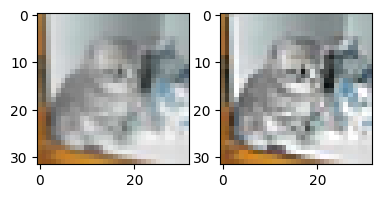

Lpips Distance: 0.111 	 Sift distance: 270.718


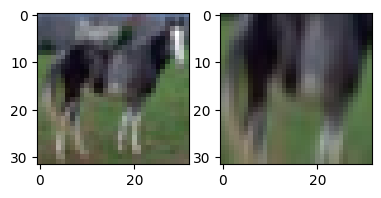

Lpips Distance: 0.330 	 Sift distance: 355.141


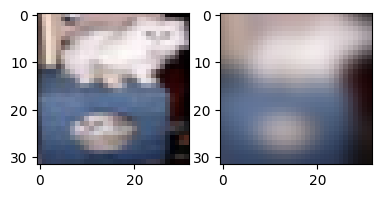

Lpips Distance: 0.008 	 Sift distance: 9.968


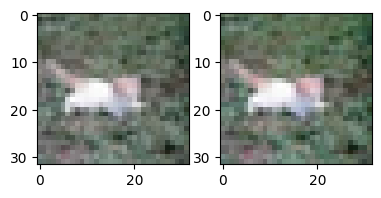

Lpips Distance: 0.326 	 Sift distance: 170.347


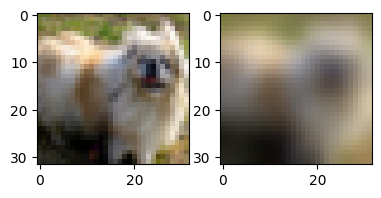

Lpips Distance: 0.002 	 Sift distance: 4.472


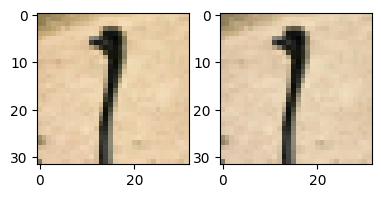

Lpips Distance: 0.024 	 Sift distance: 46.919


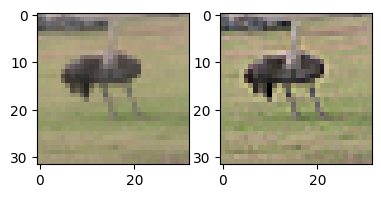

Lpips Distance: 0.277 	 Sift distance: 147.709


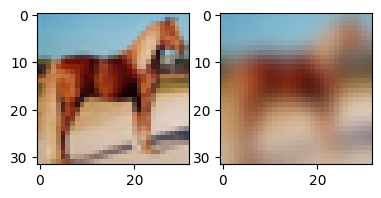

Lpips Distance: 0.000 	 Sift distance: 0.000


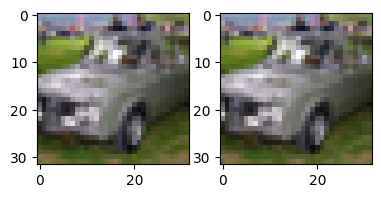

Lpips Distance: 0.226 	 Sift distance: 325.827


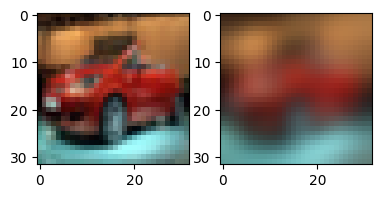

Lpips Distance: 0.057 	 Sift distance: 0.000


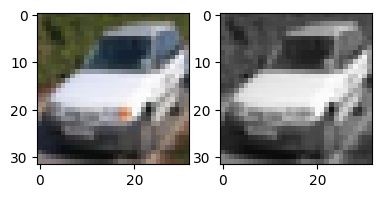

Lpips Distance: 0.030 	 Sift distance: 75.312


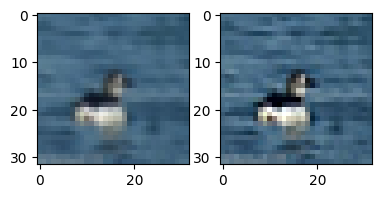

Lpips Distance: 0.056 	 Sift distance: 394.755


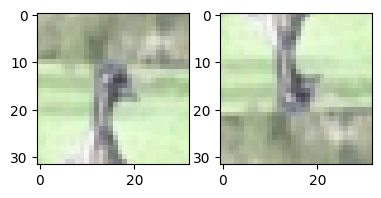

Lpips Distance: 0.020 	 Sift distance: 162.781


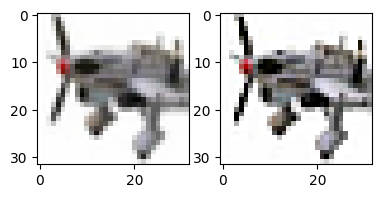

Lpips Distance: 0.231 	 Sift distance: 0.000


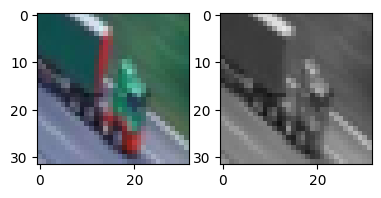

Lpips Distance: 0.101 	 Sift distance: 15.035


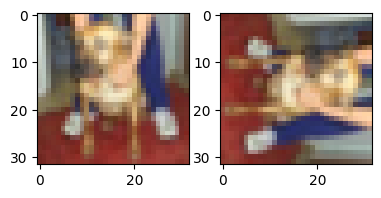

Lpips Distance: 0.048 	 Sift distance: 158.329


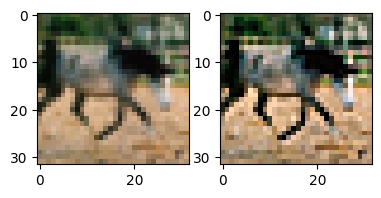

Lpips Distance: 0.067 	 Sift distance: 8.591


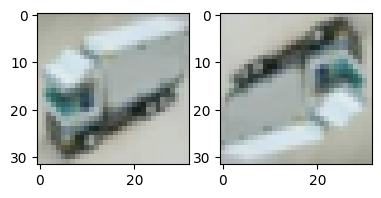

Lpips Distance: 0.007 	 Sift distance: 4.581


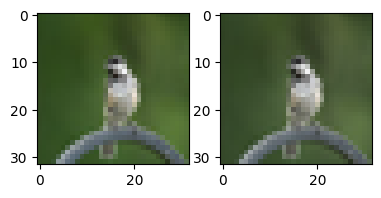

Lpips Distance: 0.024 	 Sift distance: 150.955


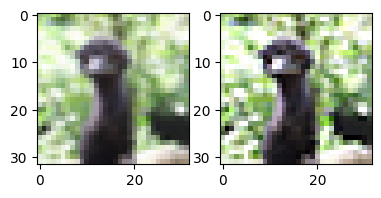

Lpips Distance: 0.054 	 Sift distance: 237.012


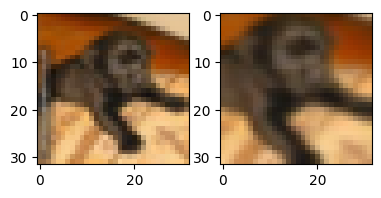

Lpips Distance: 0.002 	 Sift distance: 20.777


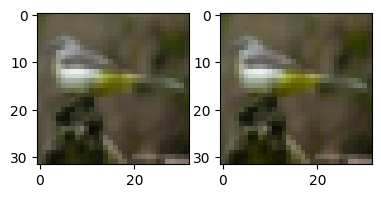

Lpips Distance: 0.034 	 Sift distance: 293.463


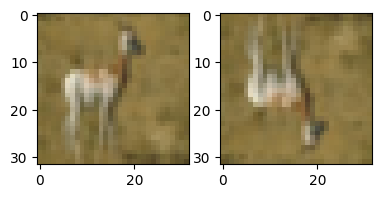

Lpips Distance: 0.090 	 Sift distance: 0.356


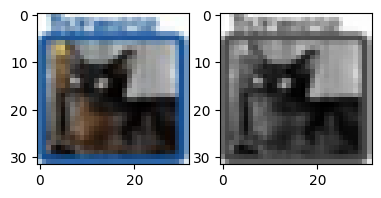

Lpips Distance: 0.000 	 Sift distance: 5.594


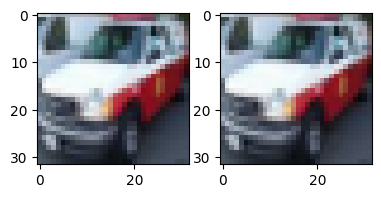

Lpips Distance: 0.000 	 Sift distance: 0.000


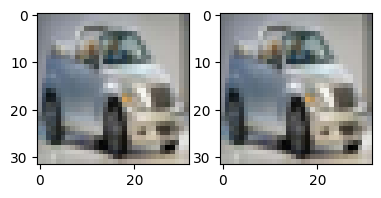

Lpips Distance: 0.107 	 Sift distance: 15.542


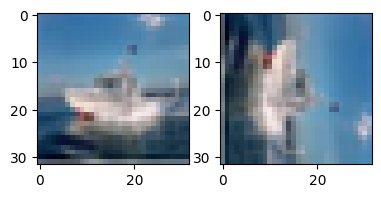

Lpips Distance: 0.000 	 Sift distance: 16.946


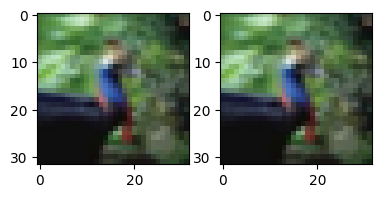

Lpips Distance: 0.000 	 Sift distance: 0.000


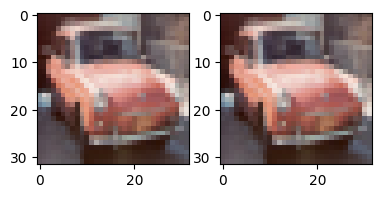

Lpips Distance: 0.143 	 Sift distance: 348.183


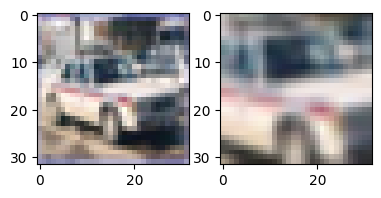

Lpips Distance: 0.236 	 Sift distance: 0.000


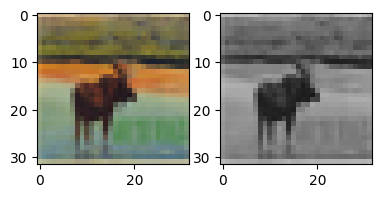

Lpips Distance: 0.000 	 Sift distance: 0.000


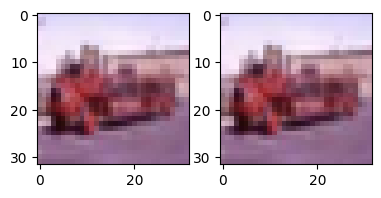

Lpips Distance: 0.374 	 Sift distance: 201.407


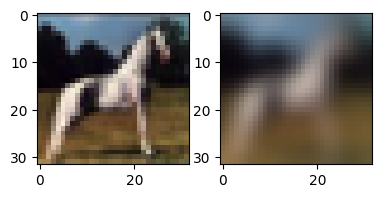

Lpips Distance: 0.144 	 Sift distance: 0.000


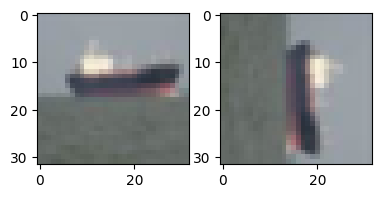

Lpips Distance: 0.045 	 Sift distance: 130.175


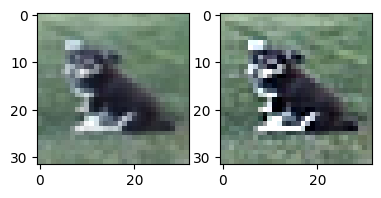

Lpips Distance: 0.070 	 Sift distance: 22.201


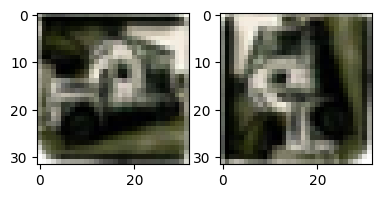

Lpips Distance: 0.000 	 Sift distance: 0.000


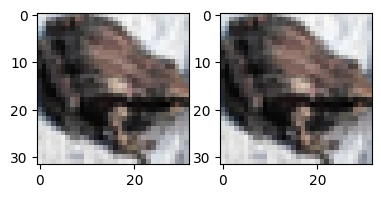

Lpips Distance: 0.039 	 Sift distance: 416.990


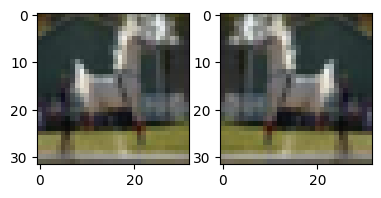

Lpips Distance: 0.065 	 Sift distance: 22.980


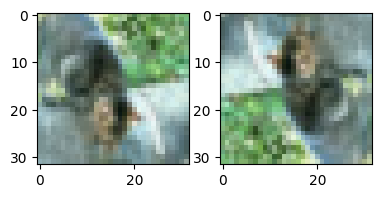

Lpips Distance: 0.264 	 Sift distance: 0.000


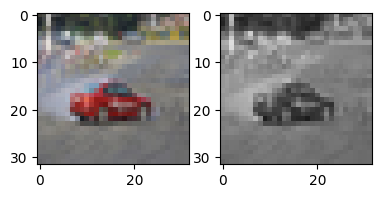

Lpips Distance: 0.002 	 Sift distance: 5.811


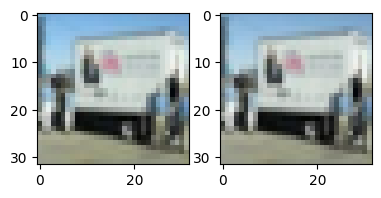

Lpips Distance: 0.089 	 Sift distance: 209.683


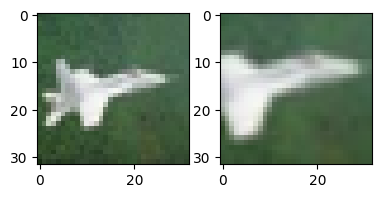

Lpips Distance: 0.027 	 Sift distance: 264.546


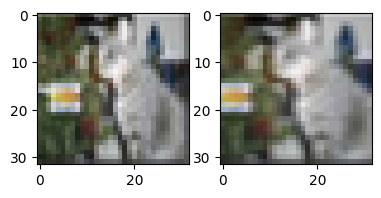

Lpips Distance: 0.056 	 Sift distance: 367.464


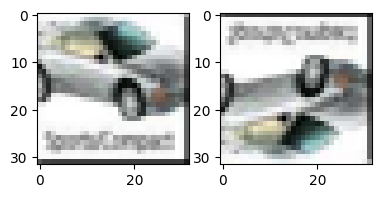

Lpips Distance: 0.101 	 Sift distance: 0.000


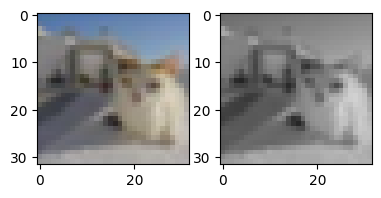

Lpips Distance: 0.378 	 Sift distance: 210.602


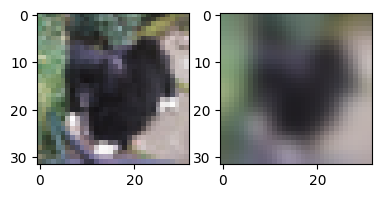

Lpips Distance: 0.038 	 Sift distance: 94.040


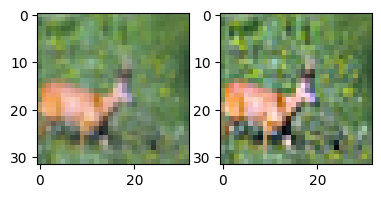

Lpips Distance: 0.000 	 Sift distance: 0.000


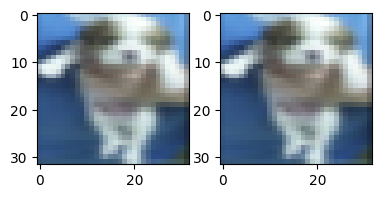

Lpips Distance: 0.136 	 Sift distance: 409.157


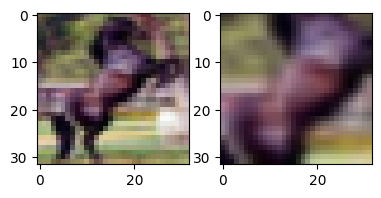

Lpips Distance: 0.055 	 Sift distance: 0.000


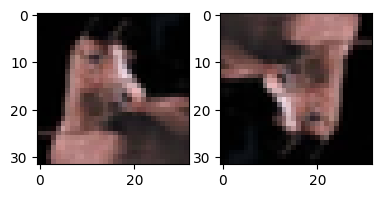

Lpips Distance: 0.000 	 Sift distance: 0.000


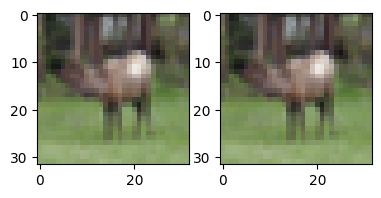

Lpips Distance: 0.097 	 Sift distance: 11.796


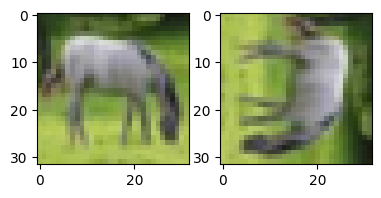

Lpips Distance: 0.183 	 Sift distance: 0.141


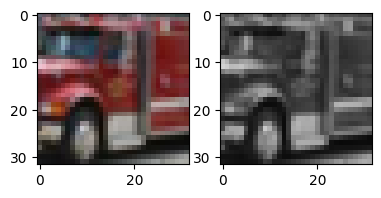

Lpips Distance: 0.031 	 Sift distance: 326.611


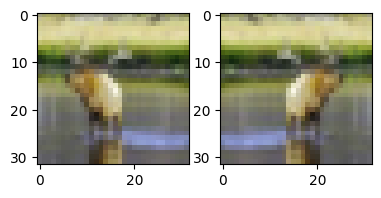

Lpips Distance: 0.038 	 Sift distance: 0.000


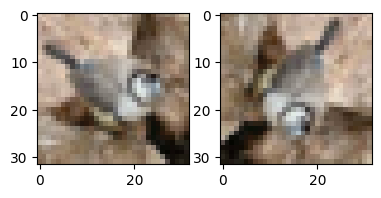

Lpips Distance: 0.104 	 Sift distance: 341.567


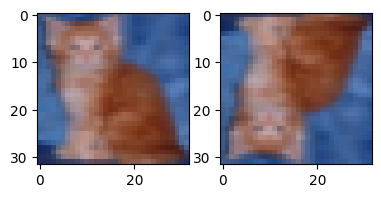

Lpips Distance: 0.231 	 Sift distance: 0.455


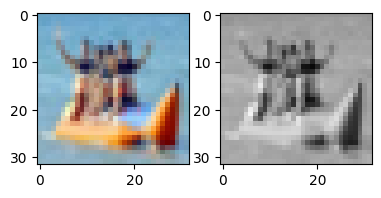

Lpips Distance: 0.032 	 Sift distance: 285.112


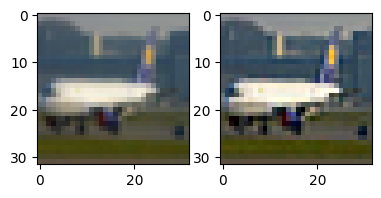

Lpips Distance: 0.000 	 Sift distance: 19.280


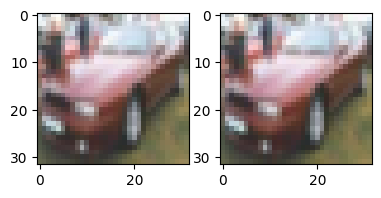

Lpips Distance: 0.043 	 Sift distance: 341.295


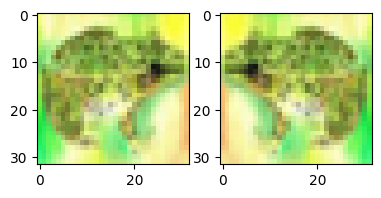

Lpips Distance: 0.026 	 Sift distance: 140.195


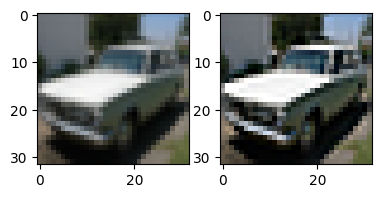

Lpips Distance: 0.003 	 Sift distance: 12.171


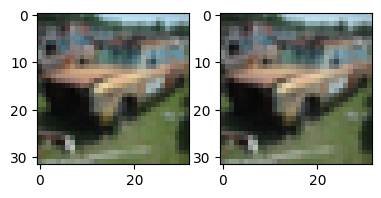

Lpips Distance: 0.346 	 Sift distance: 132.748


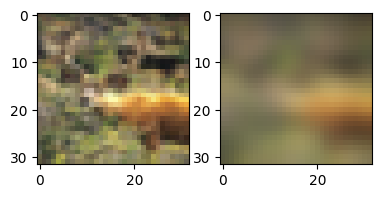

Lpips Distance: 0.000 	 Sift distance: 0.000


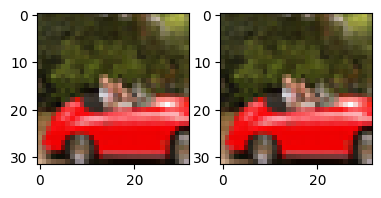

Lpips Distance: 0.038 	 Sift distance: 452.431


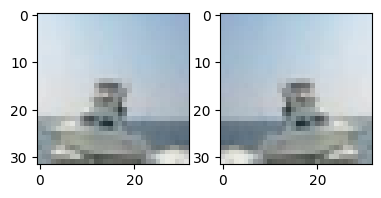

max_dist =  tensor([[[[0.4558]]]], device='cuda:0', grad_fn=<AddBackward0>)


In [66]:
max_dist = 0
for i in range(0, len(tmp_images)):
    lpips_dist = lpips_distance(tmp_images[i], single_transformation_images[i])
    sift_dist = sift_image_distance(tmp_images[i],single_transformation_images[i])
    max_dist = max(max_dist,lpips_dist)
    #print(d,end='\r')
    
    print('Lpips Distance: %.3f'%lpips_dist, "\t Sift distance: %.3f"%sift_dist)
    print_img(tmp_images[i],single_transformation_images[i])
        #break

print("max_dist = ", max_dist)

***********************

In [14]:
def rotate(image, angle):
    image = image.rotate(angle)
    return image

In [10]:
def mirror(image):
    image = ImageOps.mirror(image)
    return image

In [206]:
def color_enh(image):
    tmp = random.randint(0,2)
    if(tmp):
        factor = random.uniform(1.5, 10)
        enhancer = ImageEnhance.Color(image)
        image = enhancer.enhance(factor)
    else:
        image = image.convert("L").convert("RGB")  # Simple artistic grayscale effect

    return image

In [19]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps, ImageDraw
import random

def random_crop(image):
    w, h = image.size
    left = random.randint(0, w // 4)
    top = random.randint(0, h // 4)
    right = random.randint(3 * w // 4, w)
    bottom = random.randint(3 * h // 4, h)
    image = image.crop((left, top, right, bottom))

    image = image.resize((w,h))  # Resize your tensor/image

    return image

In [9]:
def blur(image):
    image = image.filter(ImageFilter.GaussianBlur(radius=2))
    return image

In [202]:
subset = []
original_images = []

# get 100 images random
for i in range(0, 100):
    subset.append(train_set[random.randint(0,len(train_set)-1)][0])

# get 6 images random
for i in range(0, 10):
    tmp_img = train_set[random.randint(0,len(train_set)-1)][0]

    original_images.append(tmp_img)
    
    subset.append(rotate(tmp_img,180))
    subset.append(mirror(tmp_img))
    subset.append(rotate(tmp_img, random.randint(10,350)))
    subset.append(color_enh(tmp_img))
    subset.append(random_crop(tmp_img))
    subset.append(blur(tmp_img))

print("size subset: ", len(subset))

size subset:  160


In [203]:
def get_neighbours(image, num_neigh):
    lpips_neigh = [(None,math.inf)]*num_neigh
    sift_neigh = [(None,math.inf)]*num_neigh
    
    for testing_img in subset:
        tmp_dist = lpips_distance(image,testing_img)
        i = 0
        while(i < num_neigh and tmp_dist < lpips_neigh[i][1]):
            if(i != 0):
                lpips_neigh[i-1] = lpips_neigh[i]
            i += 1
        if i != 0:
            lpips_neigh[i-1] = (testing_img,tmp_dist)
            
        
        tmp_dist = sift_image_distance(image,testing_img)
        i = 0
        while(i < num_neigh and tmp_dist < sift_neigh[i][1]):
            if(i != 0):
                sift_neigh[i-1] = sift_neigh[i]
            i += 1
        if i != 0:
            sift_neigh[i-1] = (testing_img,tmp_dist)

    return (lpips_neigh, sift_neigh)

In [204]:
def show_plot(orig_img, neighbours, num_neigh, num_plot, dist_type):
    fig = plt.figure(num_plot)
    fig.set_size_inches(12, 12)
    fig.add_subplot(5, 5, 1)
    plt.imshow(orig_img)
    plt.title(dist_type)
    plt.xticks([]) 
    plt.yticks([]) 
    for i,(img,dist) in enumerate(neighbours):
        if img == None:
            img = orig_img
        fig.add_subplot(5, 5, i+6)
        plt.imshow(img)
        plt.title("%.3f"%dist)
        plt.xticks([]) 
        plt.yticks([]) 

[(None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf), (None, inf)]


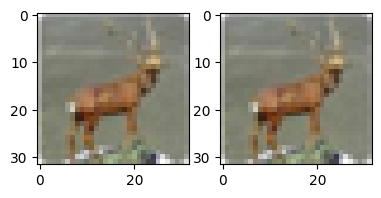

In [190]:
lpips_neigh,sift_neigh = get_neighbours(original_images[2], num_neigh)
print(sift_neigh)
print_img(original_images[2],original_images[2])

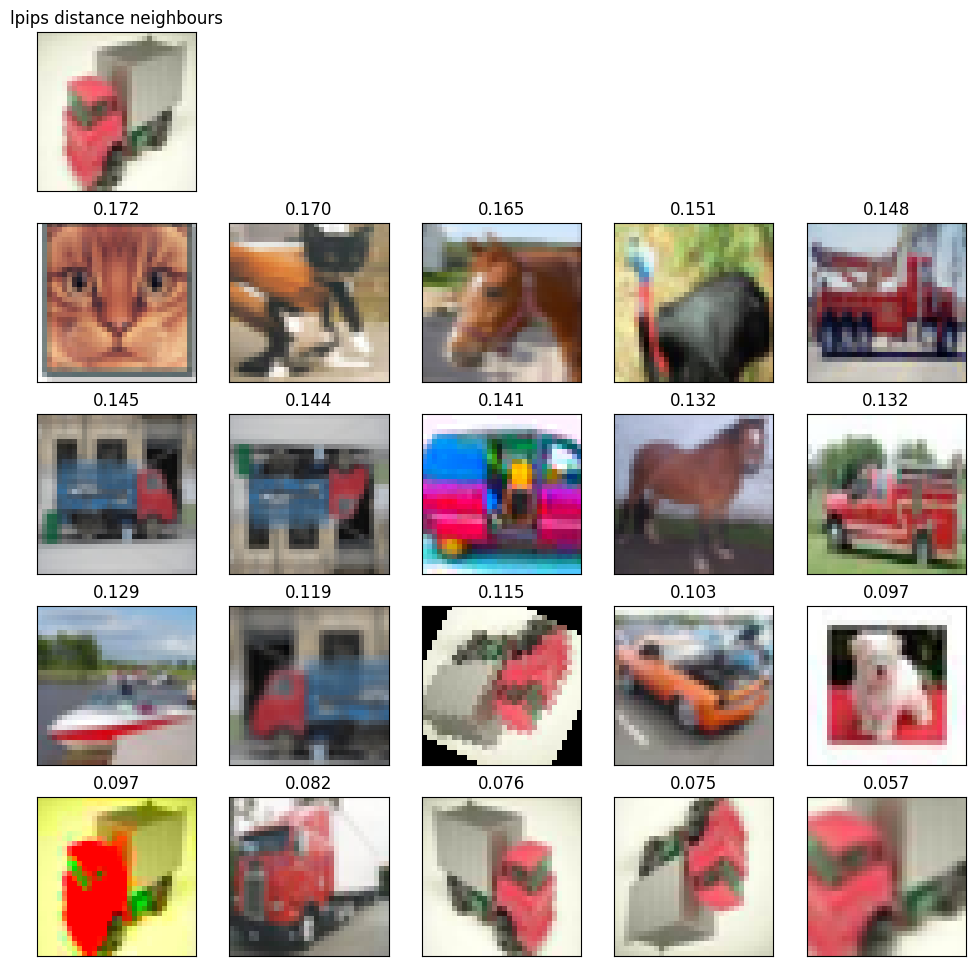

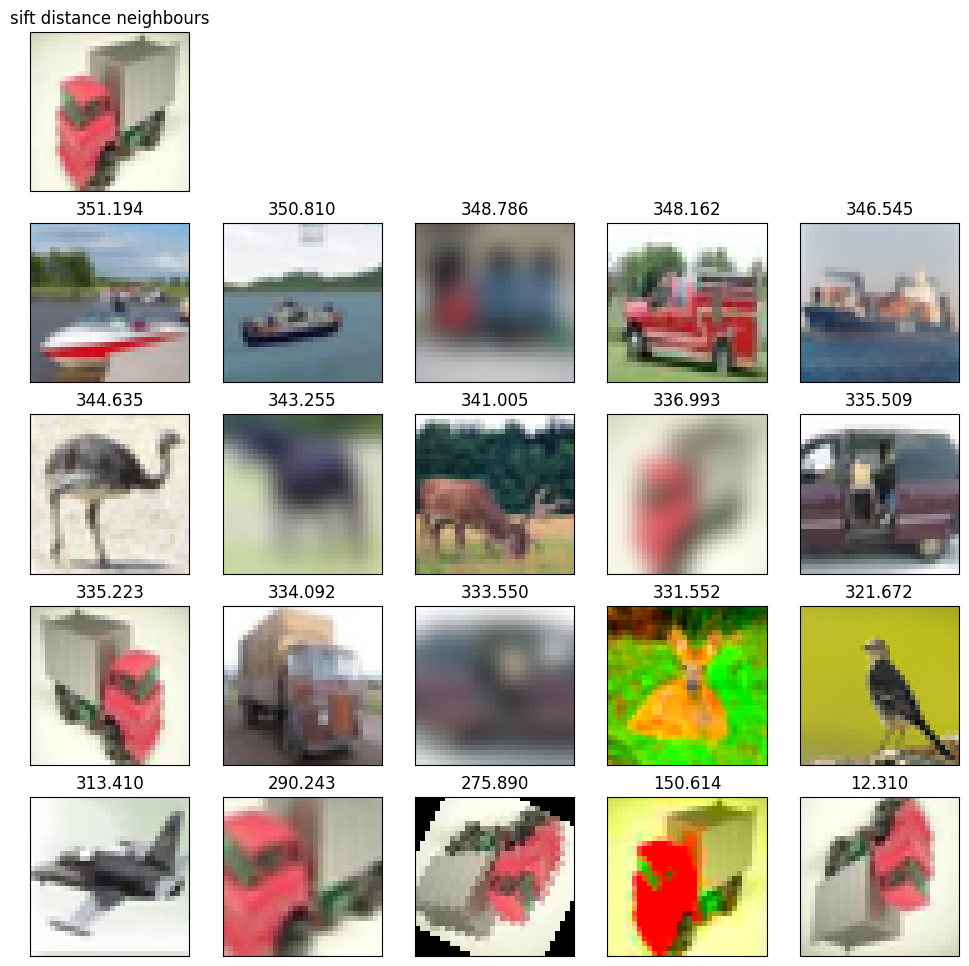

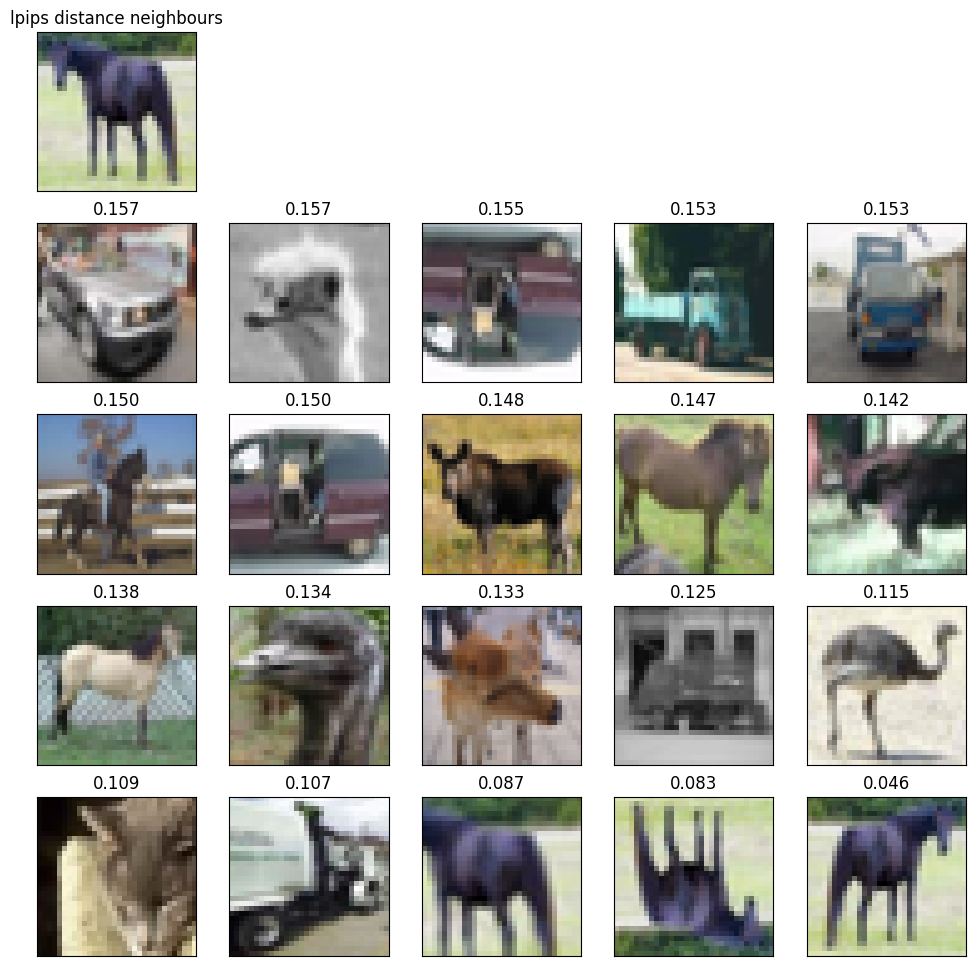

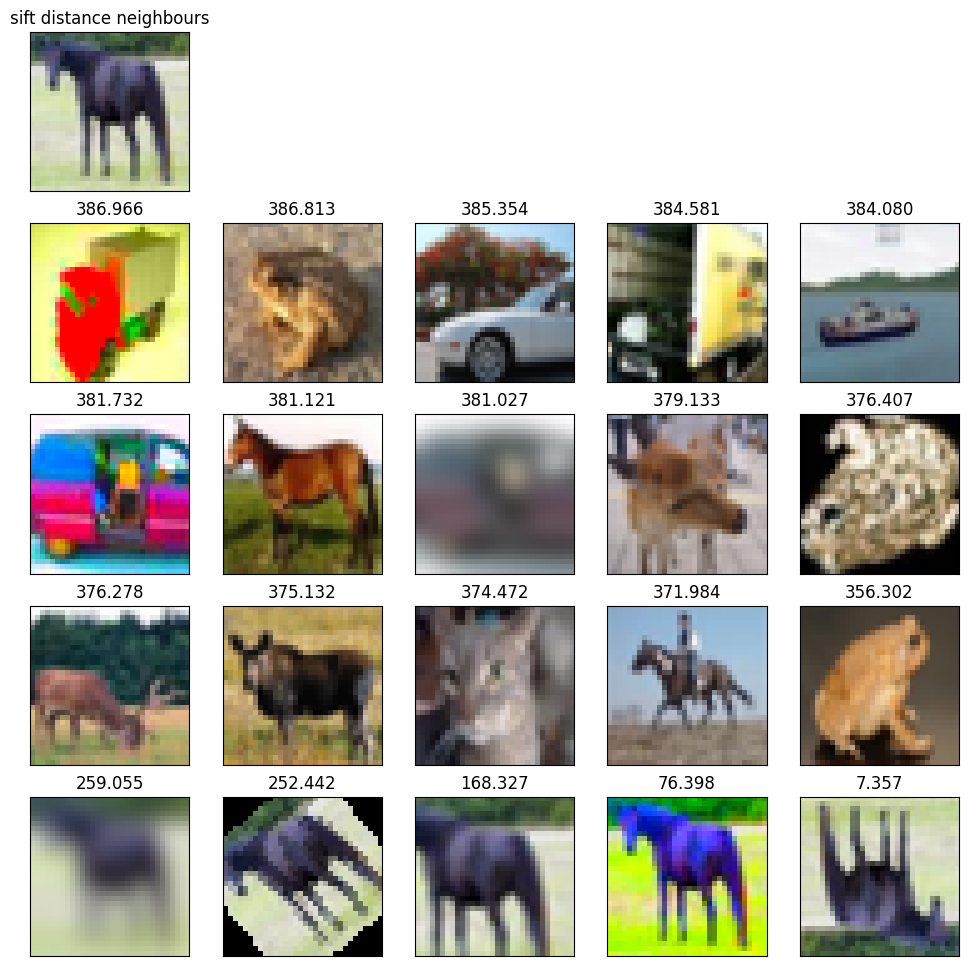

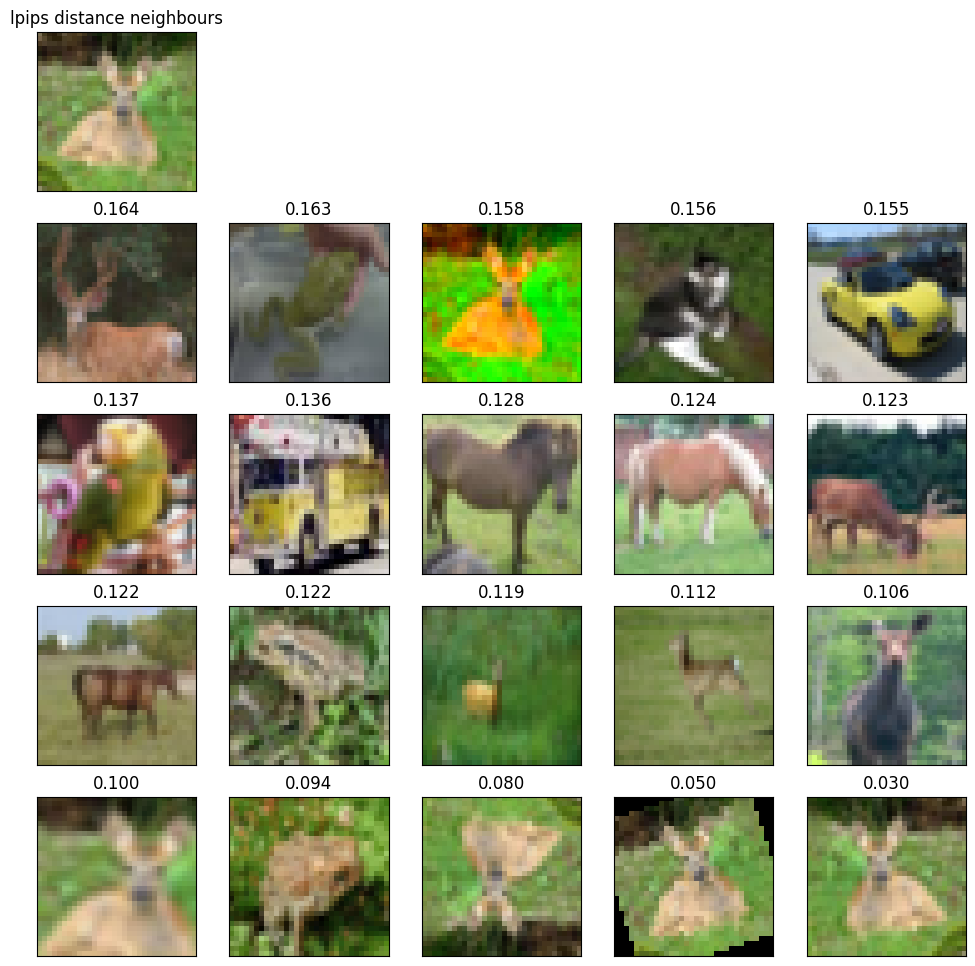

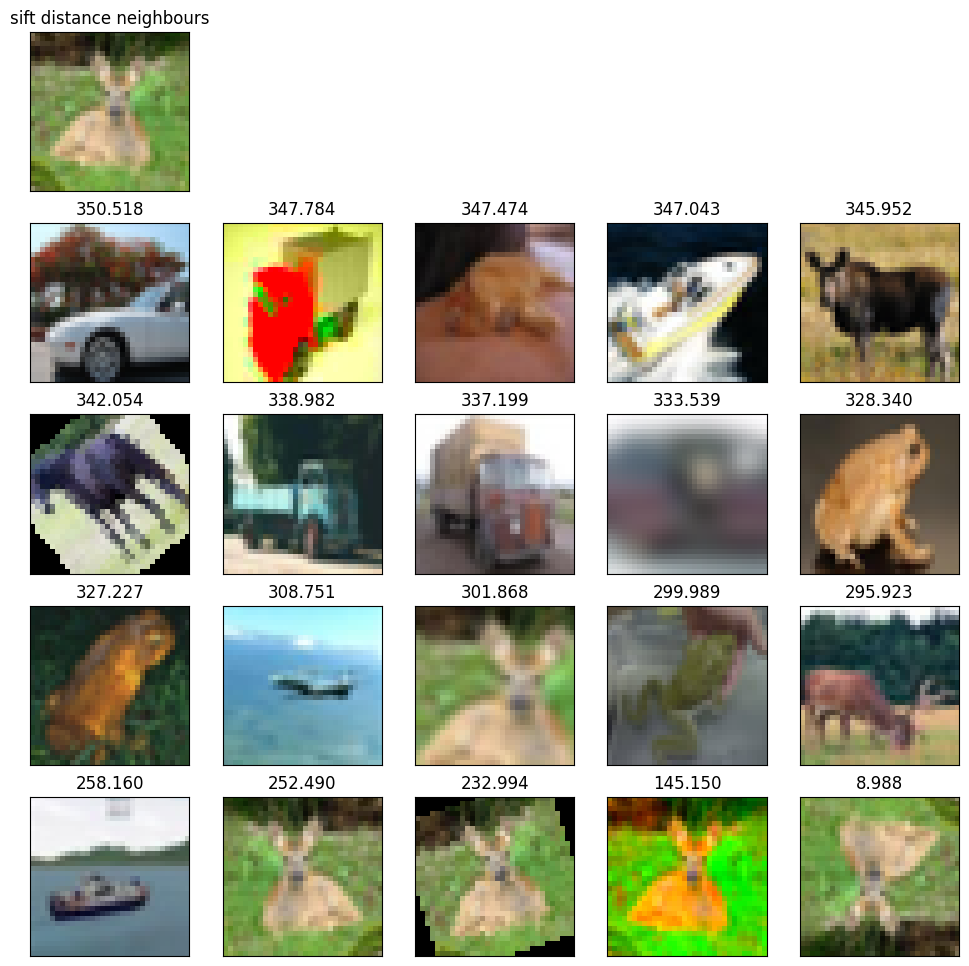

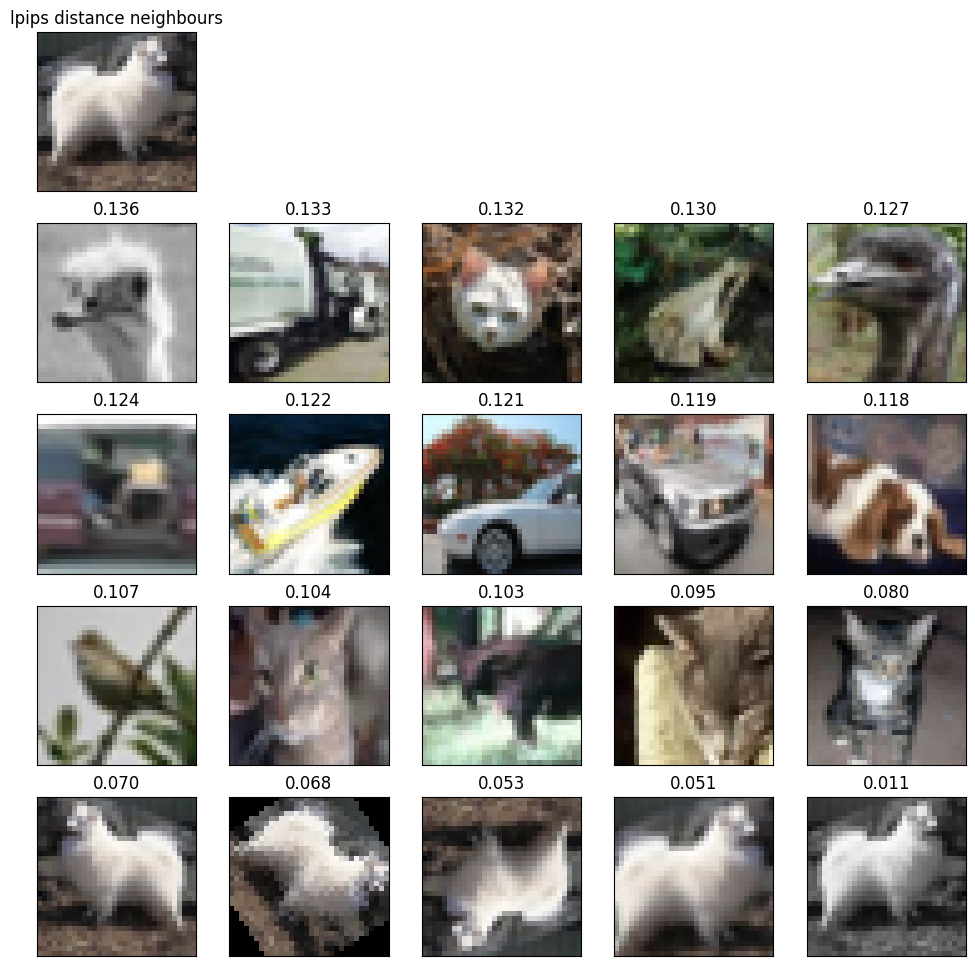

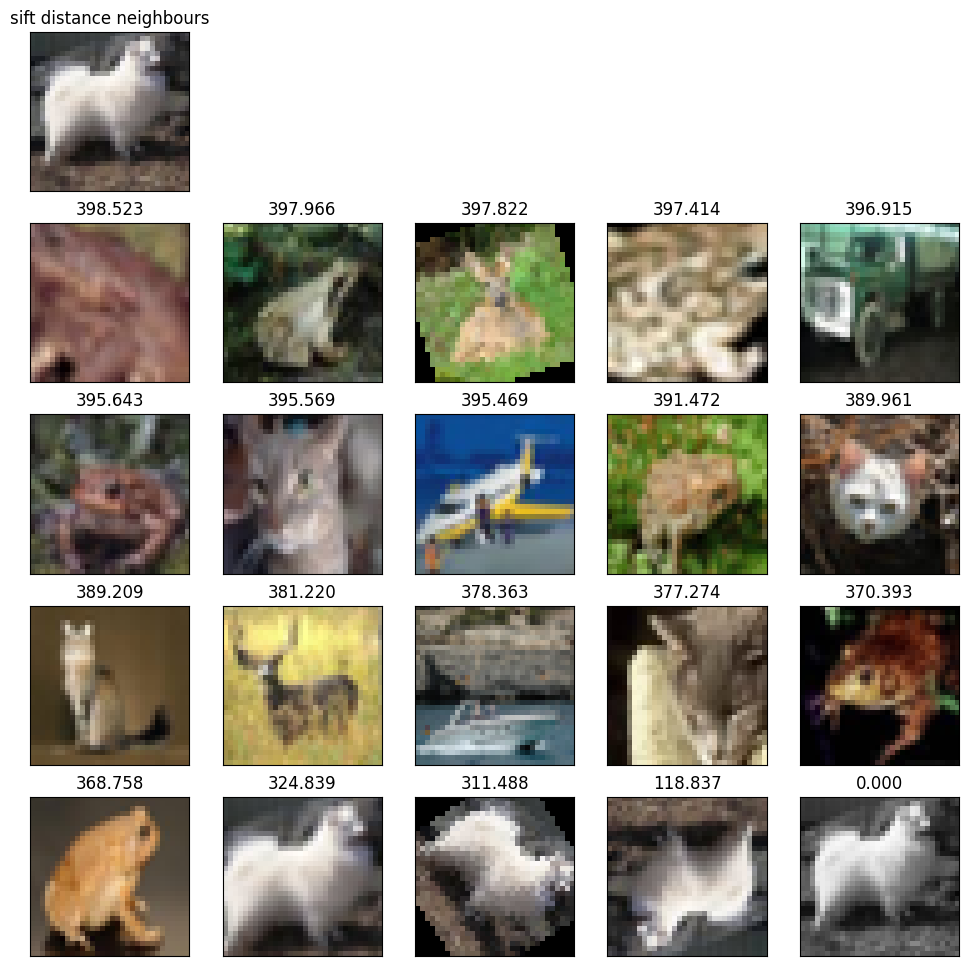

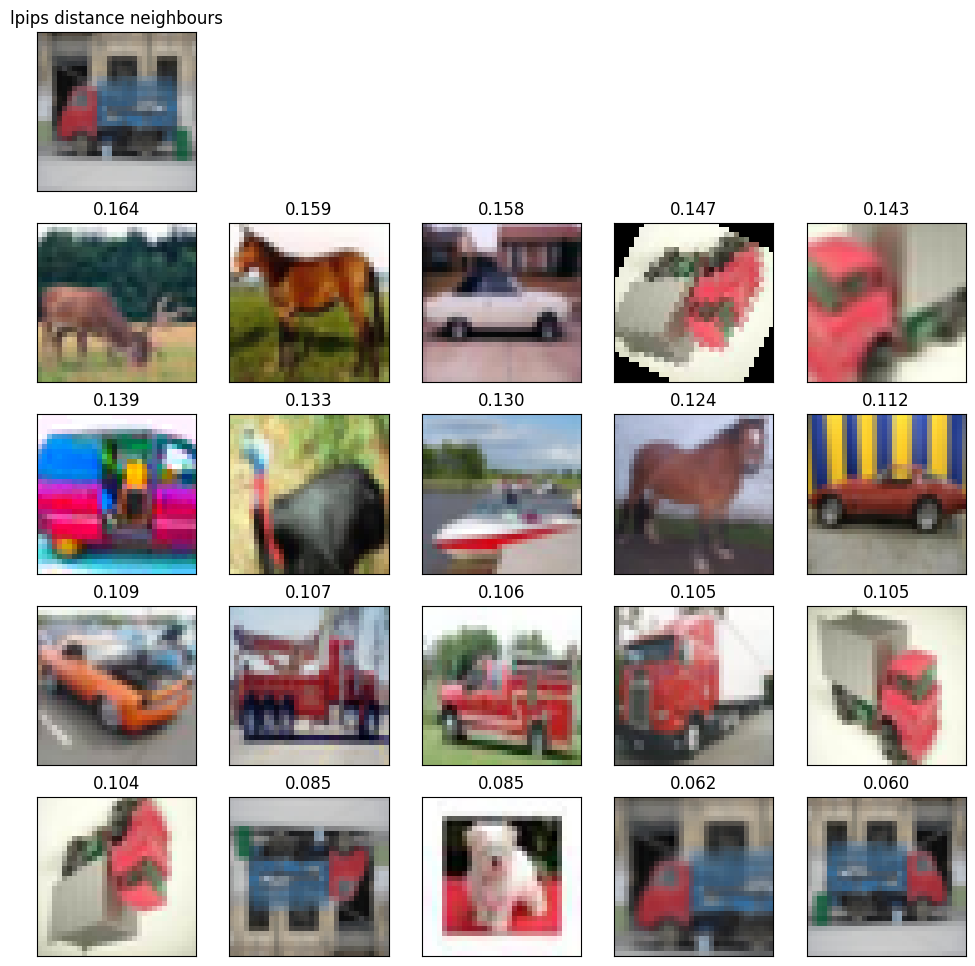

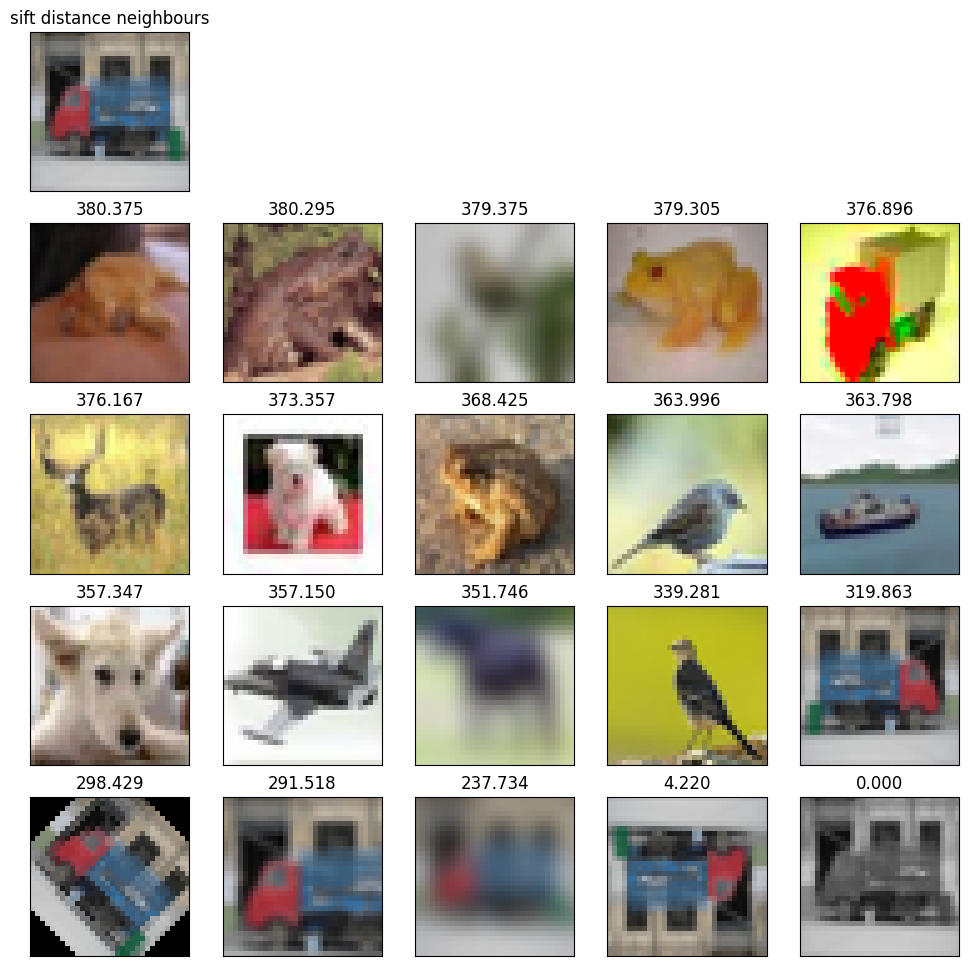

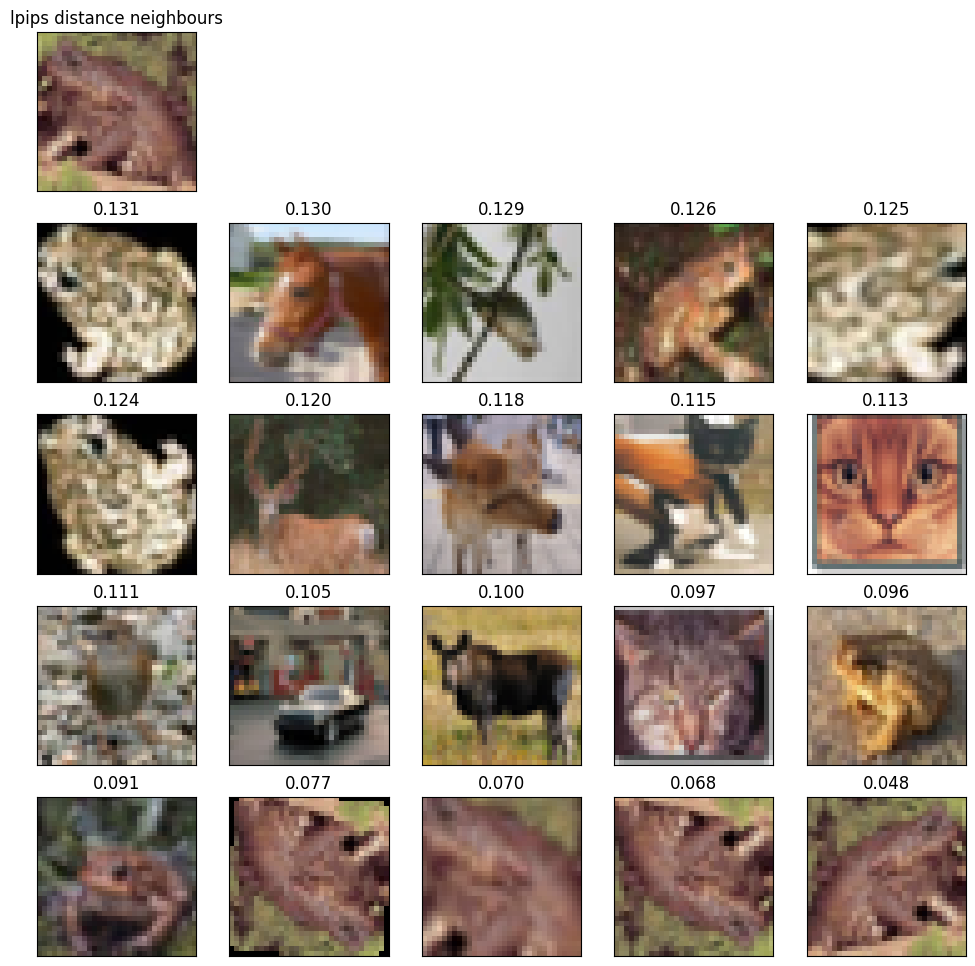

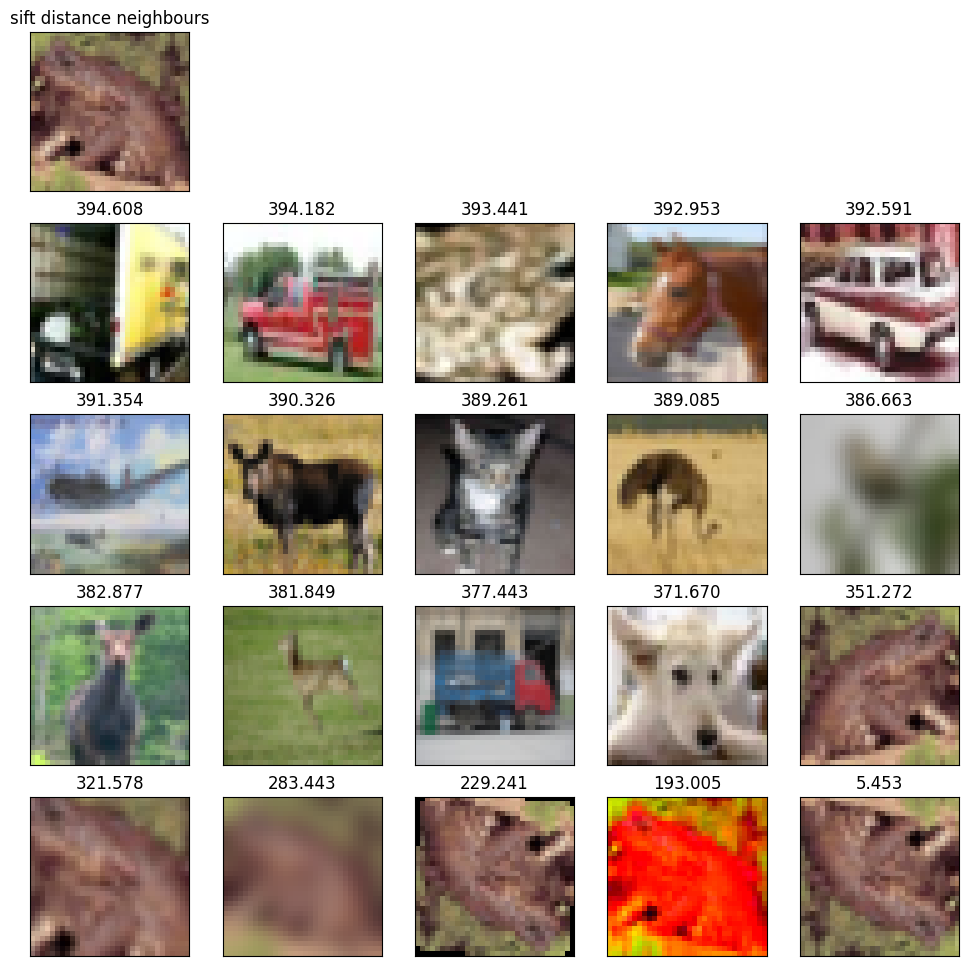

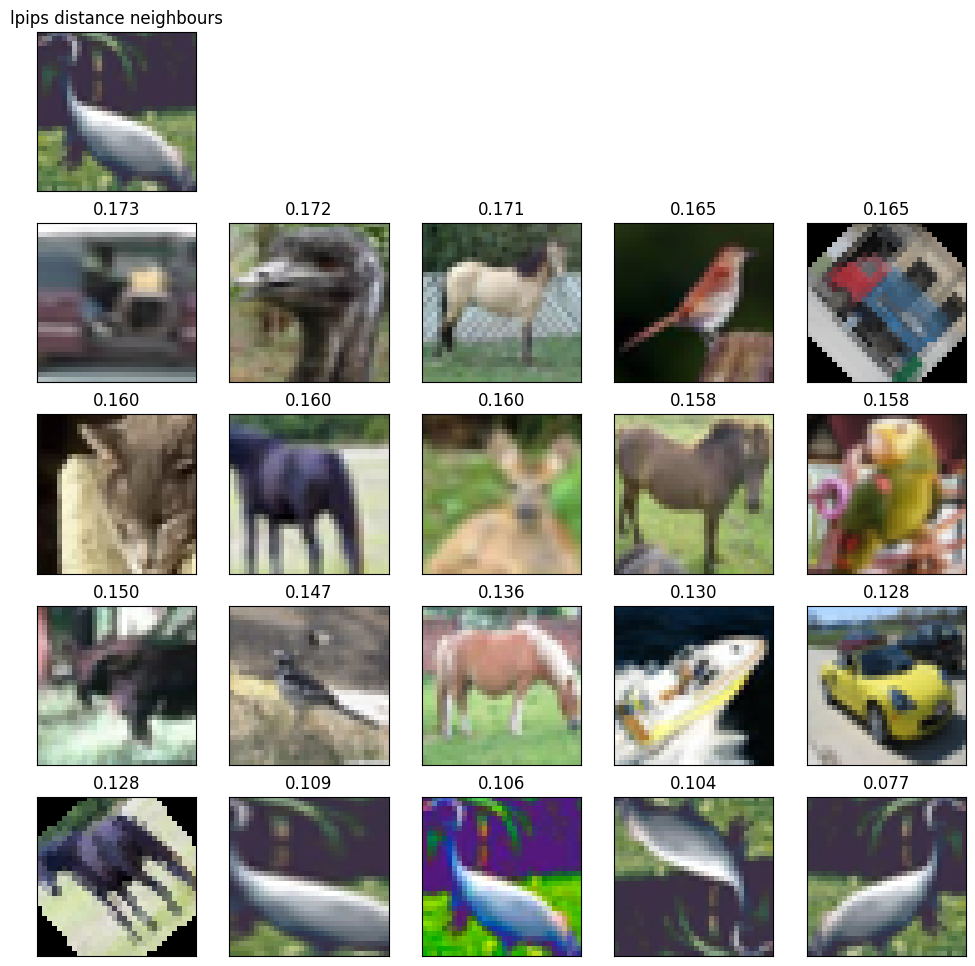

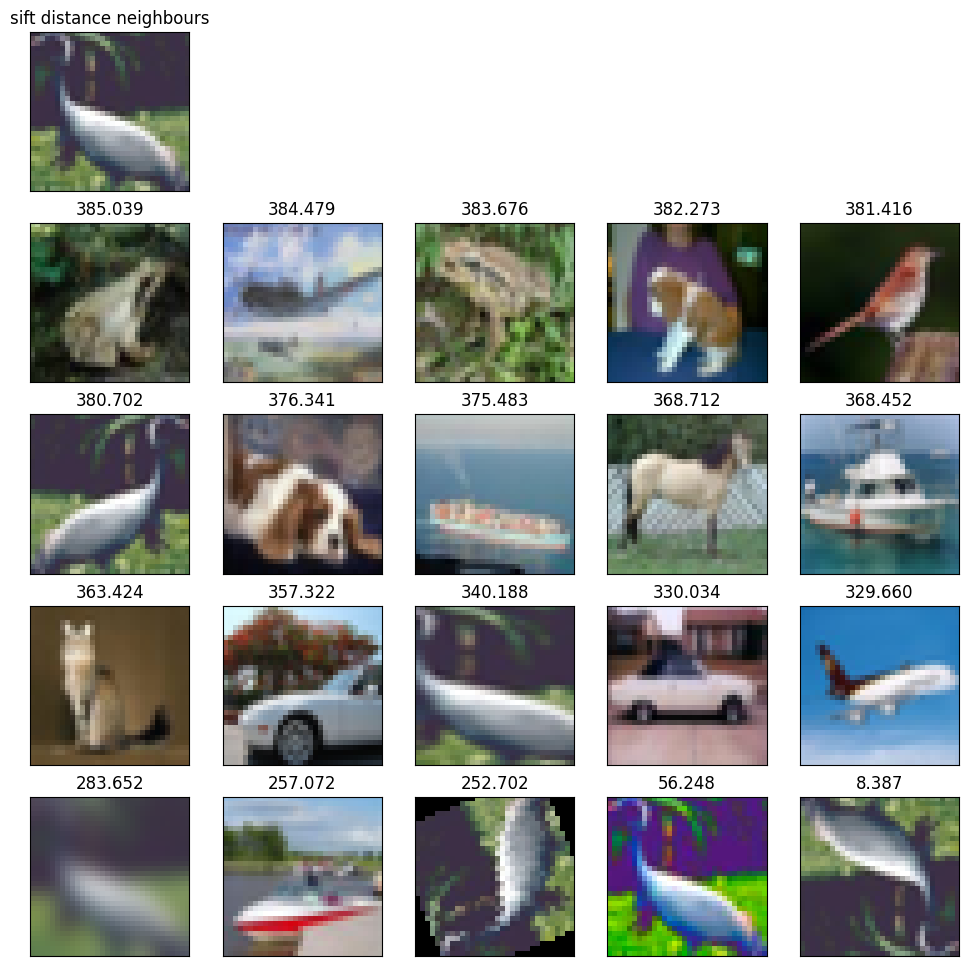

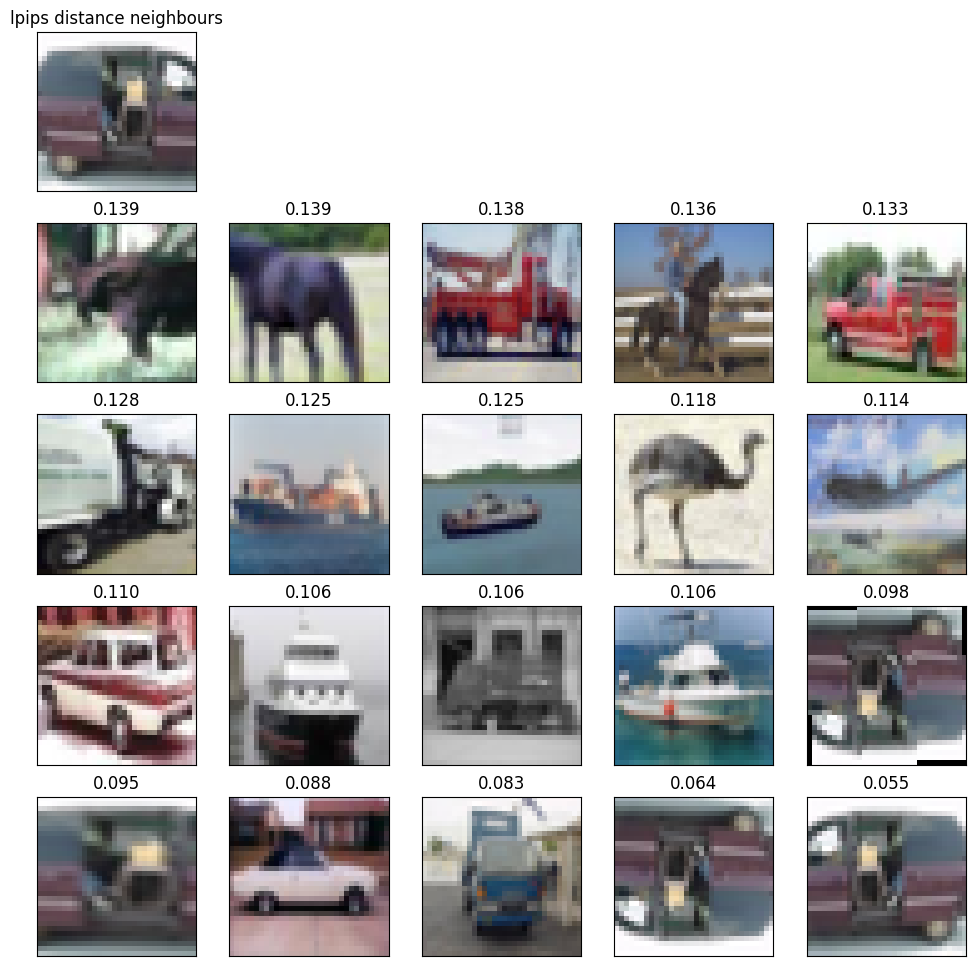

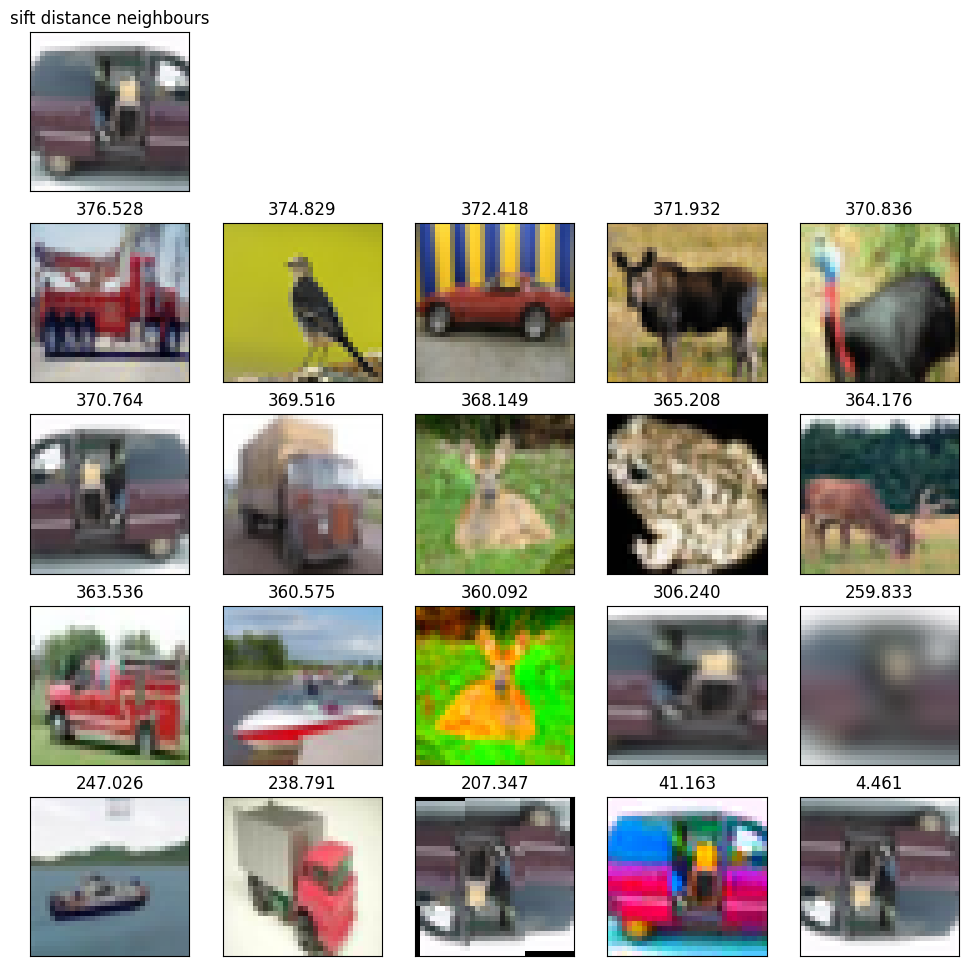

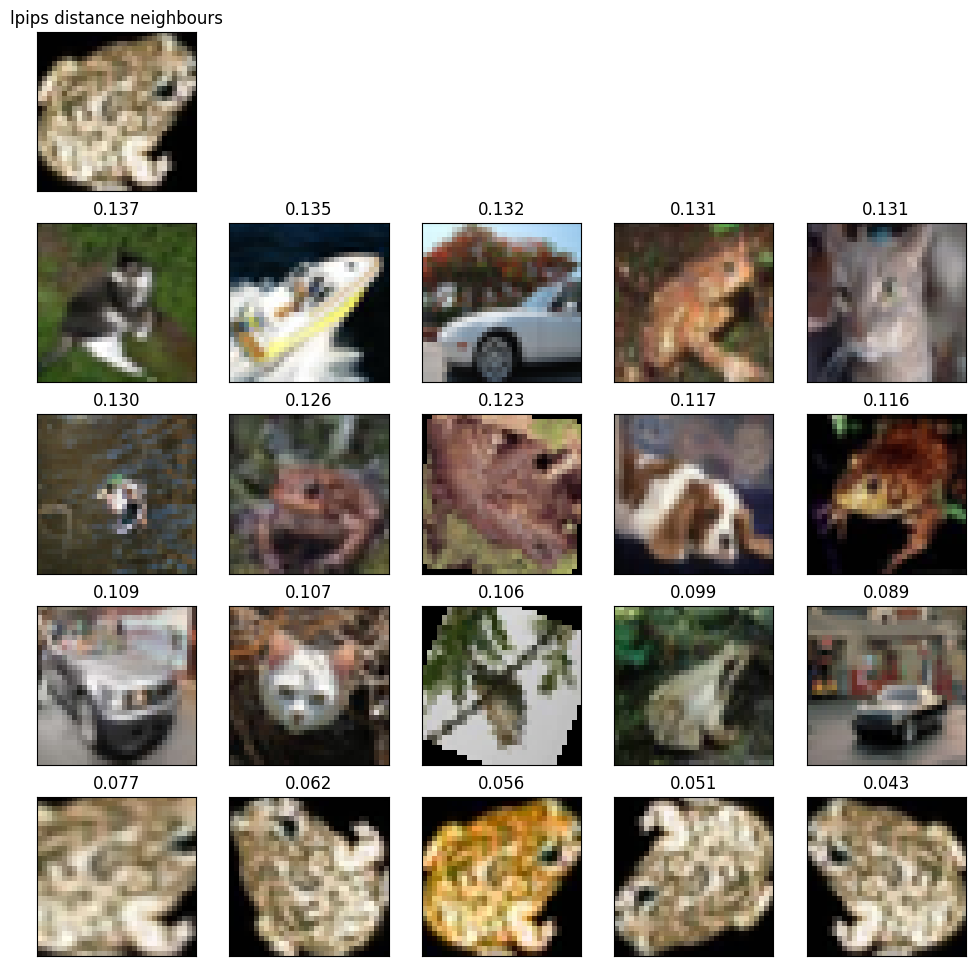

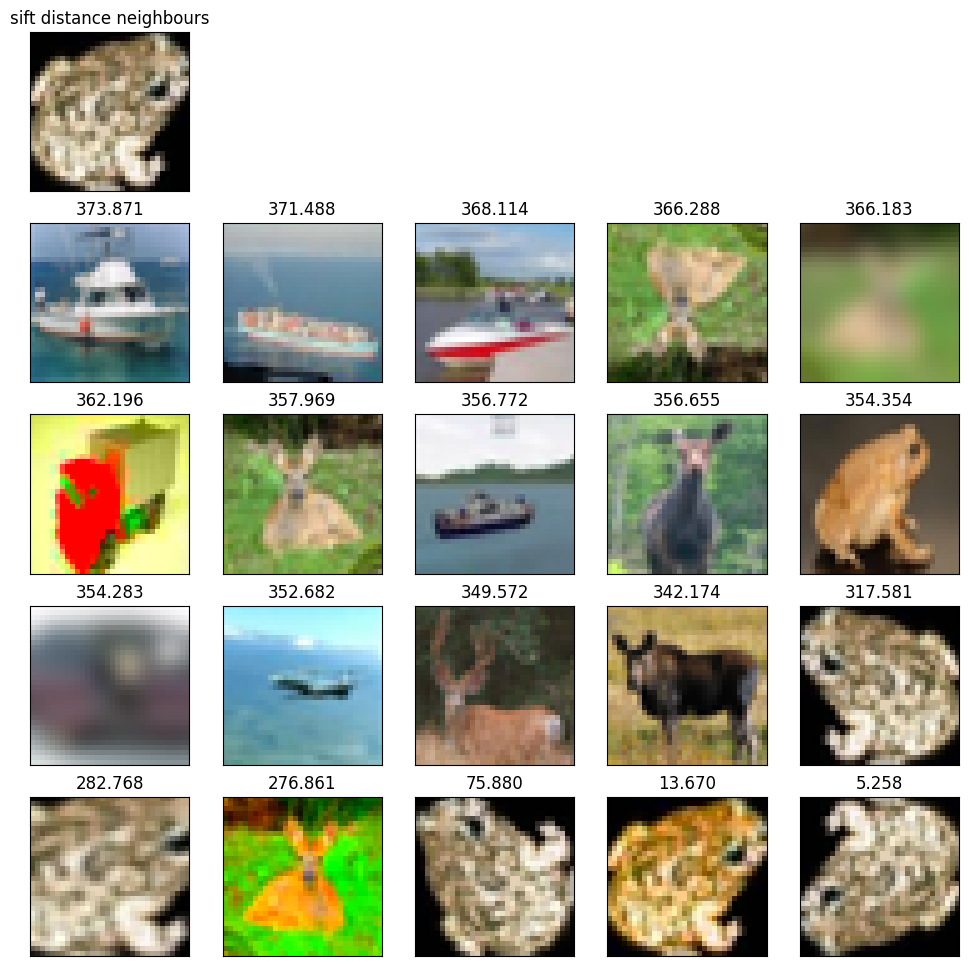

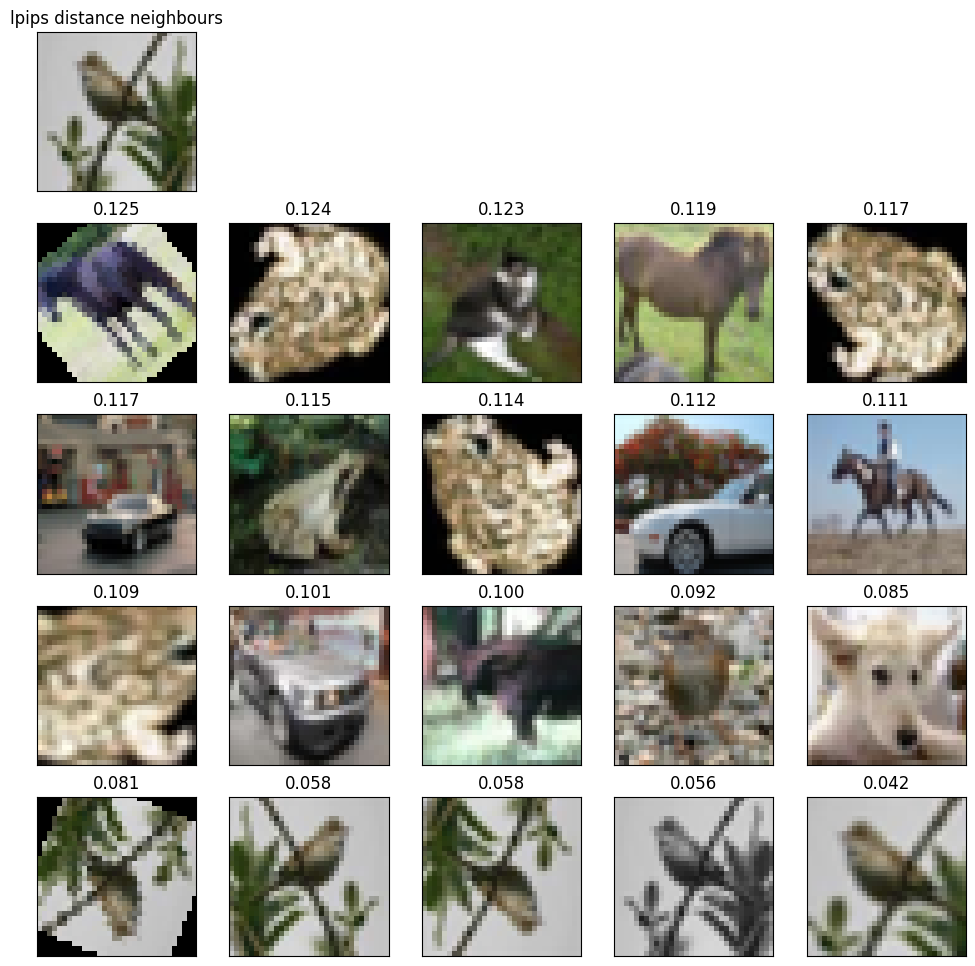

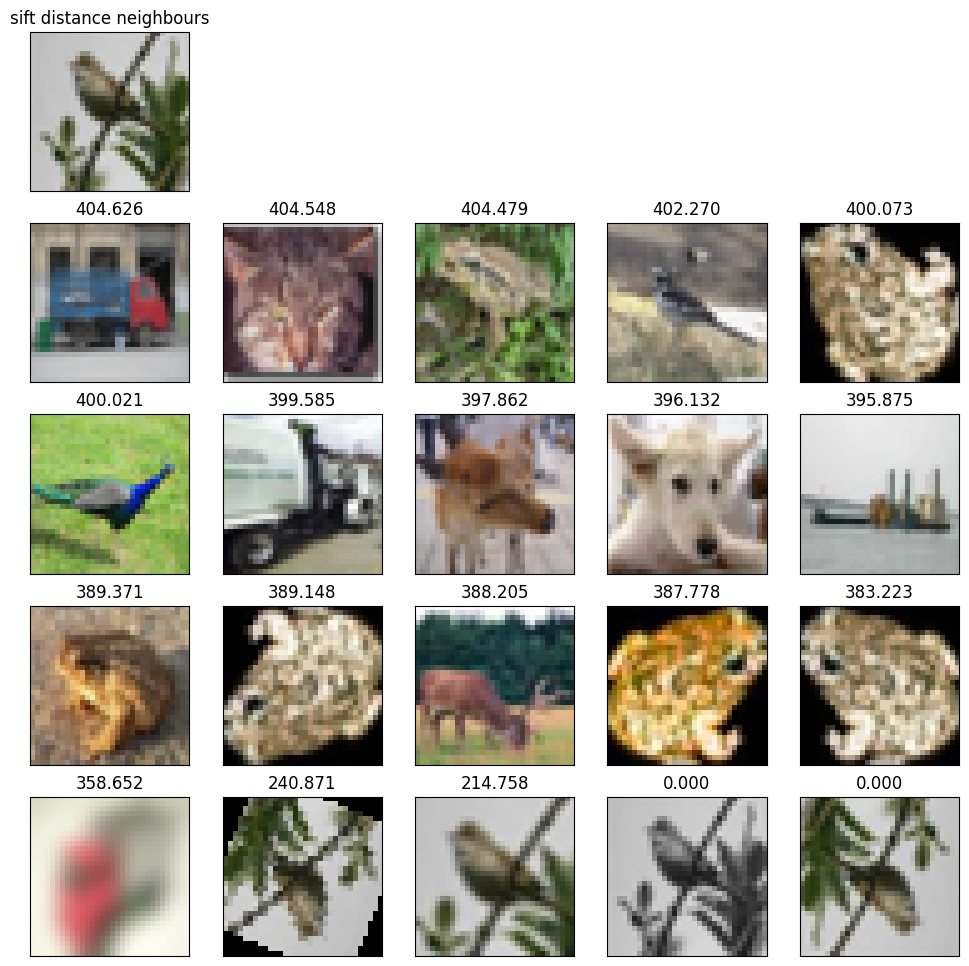

In [207]:
num_neigh = 20

for i,orig_img in enumerate(original_images):
    lpips_neigh,sift_neigh = get_neighbours(orig_img, num_neigh)
    show_plot(orig_img, lpips_neigh, num_neigh, i*2, "lpips distance neighbours")
    show_plot(orig_img, sift_neigh, num_neigh, i*2+1, "sift distance neighbours")
    